In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import os, fnmatch
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures 
import seaborn as sns
%matplotlib inline
from keras.layers import Input, Dense
from keras.models import Model
# from keras.op
from keras import optimizers
from keras import regularizers
from PIL import Image
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import pickle
import numpy as np

In [96]:
class_path = "./Class/pw_8bit/"
data = []
listOfFiles = os.listdir(class_path)
pattern = "*.tiff"
for entry in listOfFiles:
    if fnmatch.fnmatch(entry, pattern):
            data.append(class_path+entry)

In [97]:
len(data)

20389

In [98]:
data

['./Class/pw_8bit/cv~AC Cnc.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_1957.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_2249.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_2640.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_3616.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_3714.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_3779.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_3890.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_3925.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_4761.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_5529.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_6221.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_6291.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_6936.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_7943.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_803.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_8561.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_8565.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_8770.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_9583.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_989.tiff',
 './Class/pw_8bit/cv~AC Cnc_0_9936.tiff',
 './Class/pw_8bit/cv~AN UMa.tiff',
 './Class/pw_8bit/cv~AN UMa_0_1162.tiff',
 './Clas

In [99]:
data_list = []
for i in range(len(data)):
    arr_obj = []
    cl = (data[i].split("/")[3]).split("~")[0]
    if cl == "WD" or cl == "Sy1" or cl == "cv" : continue
    arr_obj.append(cl)
    arr_obj.append(data[i])
    data_list.append(arr_obj)

In [100]:
df = pd.DataFrame(data_list)

In [101]:
df.head()

,0,1
0,C,./Class/pw_8bit/C~0445+0107.tiff
1,C,./Class/pw_8bit/C~0445+0107_0_1217.tiff
2,C,./Class/pw_8bit/C~0445+0107_0_1762.tiff
3,C,./Class/pw_8bit/C~0445+0107_0_216.tiff
4,C,./Class/pw_8bit/C~0445+0107_0_2215.tiff


In [102]:
df[0].value_counts()

M      4616
sd     4474
Mrk    3574
QSO    1806
PN      585
C       584
Name: 0, dtype: int64

In [103]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df[0])
df[0]=le.transform(df[0])

In [104]:
df.head()

,0,1
0,0,./Class/pw_8bit/C~0445+0107.tiff
1,0,./Class/pw_8bit/C~0445+0107_0_1217.tiff
2,0,./Class/pw_8bit/C~0445+0107_0_1762.tiff
3,0,./Class/pw_8bit/C~0445+0107_0_216.tiff
4,0,./Class/pw_8bit/C~0445+0107_0_2215.tiff


In [105]:
df[0].value_counts()

1    4616
5    4474
2    3574
4    1806
3     585
0     584
Name: 0, dtype: int64

In [106]:
X = df.iloc[:, 1]
Y = df.iloc[:, 0]

In [107]:
X = X.values
Y = Y.values

In [108]:
images_list = []
max_width = 0
max_height = 0
ind = 0
for i in range(len(X)):
    im = Image.open(X[i])
    arr = np.array(im)#.flatten()
    
    arr=(arr-arr.min())/(arr.max()-arr.min())
    #arr = arr / 0xffff
    s = arr.shape
    if s[0] > max_height:
        max_height = s[0]
    if s[1] > max_width:
        max_width = s[1]
        ind = i
    images_list.append(arr)

In [109]:
print(max_width, max_height, len(images_list))

40 140 15639


In [110]:
for i in range(len(images_list)):
    s = images_list[i].shape
    d_width = (max_width - s[1])
    d_height = (max_height - s[0])
    
    d_top = int(d_height / 2)
    d_bottom = int(d_height - d_top)
    
    d_left = int(d_width / 2)
    d_right = int(d_width - d_left)
    #print(d_top, d_bottom, d_left, d_right)
    
    arr = images_list[i]
    for l in range(d_left):
        arr = np.insert(arr, 0, 0, axis = 1)
    
    for r in range(d_right):
        b = np.zeros((s[0],1))
        arr = np.append(arr, b, axis = 1)
    
    for t in range(d_top):
        arr = np.insert(arr, 0, 0, axis = 0)
    
    for b in range(d_bottom):
        b = np.zeros((1, arr.shape[1],))
        arr = np.append(arr, b, axis = 0)
    
    images_list[i] = arr.flatten()

40 140


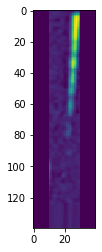

In [111]:
width = max_width
height = max_height
print(width, height)
plt.imshow(images_list[13].reshape(140, 40))

In [112]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import keras
#print(device_lib.list_local_devices())

config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} ) 
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [113]:
images_np = np.array(images_list)

In [114]:
X_train, X_test, Y_train, Y_test = train_test_split(images_np, Y, test_size=0.2, random_state=100, stratify=Y)
Y_train = keras.utils.to_categorical(Y_train, 6)
Y_test = keras.utils.to_categorical(Y_test, 6)

In [67]:
#X_train = X_train.reshape(X_train.shape[0], 140, 40, 1)
#X_test = X_test.reshape(X_test.shape[0], 140, 40, 1)
#input_shape = (140, 40, 1)

In [115]:
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (12511, 5600)
12511 train samples
3128 test samples


In [117]:
#from keras.models import Sequential
#from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#
#model = Sequential()
#model.add(Conv2D(128, kernel_size=(3,3), input_shape=input_shape, padding="same"))
#model.add(MaxPooling2D(pool_size=(3, 1)))
#
#model.add(Conv2D(64, (3, 3), padding="same"))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3, 1)))
#
#model.add(Conv2D(32, (3, 3), padding="same"))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(3, 4)))
#
#model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#model.add(Dense(128, activation=tf.nn.relu))
#model.add(Dropout(0.5))
#model.add(Dense(9,activation=tf.nn.softmax))

from keras.regularizers import l2
from keras.regularizers import l1
from keras.layers import Dropout
inpu_dim = X_train.shape[1]
h_1 = 2048
h_2 = 1024
h_3 = 512
out_shape = 6

input_vect = Input(shape = (inpu_dim,))
x = BatchNormalization()(input_vect)
x = Dropout(0.5)(x)
x = Dense(h_1, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(h_2, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(h_3, activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
out_layer = Dense(out_shape, activation='softmax')(x)

model = Model(input_vect, out_layer)


In [119]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 5600)              0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 5600)              22400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 5600)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2048)              11470848  
_________________________________________________________________
batch_normalization_10 (Batc (None, 2048)              8192      
_________________________________________________________________
dropout_13 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1024)              2098176   
__________

In [120]:
#cw = {0:1, 1:1, 2:1, 3:1, 4:1, 5:1, 6:1, 7:1, 8:1}
adadelta = optimizers.Adadelta(lr=0.1, rho=0.95)
model.compile(optimizer=adadelta , loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
#, class_weight=cw
history = model.fit(X_train, Y_train, epochs = 20, batch_size = 128, shuffle=True, validation_data=(X_test, Y_test))

Train on 12511 samples, validate on 3128 samples
Epoch 1/20
12511/12511 [==============================] - 7s 536us/step - loss: 0.1610 - acc: 0.9356 - val_loss: 0.1813 - val_acc: 0.9304
Epoch 2/20
12511/12511 [==============================] - 7s 536us/step - loss: 0.1586 - acc: 0.9373 - val_loss: 0.1824 - val_acc: 0.9293
Epoch 3/20
12511/12511 [==============================] - 7s 535us/step - loss: 0.1636 - acc: 0.9350 - val_loss: 0.1806 - val_acc: 0.9303
Epoch 4/20
12511/12511 [==============================] - 7s 535us/step - loss: 0.1613 - acc: 0.9362 - val_loss: 0.1812 - val_acc: 0.9305
Epoch 5/20
12511/12511 [==============================] - 7s 541us/step - loss: 0.1594 - acc: 0.9361 - val_loss: 0.1800 - val_acc: 0.9307
Epoch 6/20
12511/12511 [==============================] - 7s 539us/step - loss: 0.1575 - acc: 0.9373 - val_loss: 0.1830 - val_acc: 0.9302
Epoch 7/20
12511/12511 [==============================] - 7s 536us/step - loss: 0.1608 - acc: 0.9352 - val_loss: 0.1833 - v

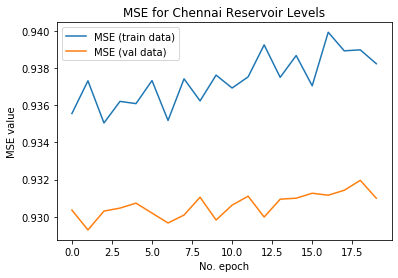

In [195]:
plt.plot(history.history['acc'], label='MSE (train data)')
plt.plot(history.history['val_acc'], label='MSE (val data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [196]:
prediction = model.predict(X_test)

In [197]:
Y_test

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [198]:
for i in range(len(prediction)):
    prediction[i] = prediction[i] > 0.5

In [199]:
prediction

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0.]], dtype=float32)

In [200]:
prediction.shape

(3128, 6)

In [201]:
Y_test.shape

(3128, 6)

In [202]:
c = 0
for i in range(len(Y_test)):
    if(np.array_equal(Y_test[i], prediction[i])):
        c = c + 1

In [203]:
print(c)

2363


In [164]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(Y_test, prediction))
print ('F1 score:', f1_score(Y_test, prediction, average = "weighted"))
print ('Recall:', recall_score(Y_test, prediction, average = "weighted"))
print ('Precision:', precision_score(Y_test, prediction, average = "weighted"))
print ('\n clasification report:\n', classification_report(Y_test,prediction))
print ('\n confussion matrix:\n',confusion_matrix(Y_test, prediction))

Accuracy: 0.7554347826086957
F1 score: 0.761847617520953
Recall: 0.7554347826086957
Precision: 0.8027971518249821

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.26      0.42       117
           1       0.79      0.93      0.86       923
           2       0.81      0.83      0.82       715
           3       1.00      1.00      1.00       117
           4       0.50      0.20      0.29       361
           5       0.88      0.77      0.82       895

   micro avg       0.82      0.76      0.78      3128
   macro avg       0.83      0.67      0.70      3128
weighted avg       0.80      0.76      0.76      3128
 samples avg       0.76      0.76      0.76      3128



ValueError: multilabel-indicator is not supported

In [253]:
prediction = model.predict(images_np)

In [254]:
#for i in range(len(prediction)):
#    prediction[i] = prediction[i] > 0.5
for i in range(len(prediction)):
    m = np.max(prediction[i])
    
    for j in range(len(prediction[i])):
        if prediction[i][j] == m:
            prediction[i][j] = 1
        else:
            prediction[i][j] = 0

In [255]:
prediction

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [256]:
Y_pred = keras.utils.to_categorical(Y, 6)

In [257]:
Y_pred

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [258]:
c = 0
for i in range(len(Y_pred)):
    if(np.array_equal(Y_pred[i], prediction[i])):
        c = c + 1

In [261]:
df.head()

,0,1
0,0,./Class/pw_8bit/C~0445+0107.tiff
1,0,./Class/pw_8bit/C~0445+0107_0_1217.tiff
2,0,./Class/pw_8bit/C~0445+0107_0_1762.tiff
3,0,./Class/pw_8bit/C~0445+0107_0_216.tiff
4,0,./Class/pw_8bit/C~0445+0107_0_2215.tiff


In [263]:
df["pred"] = np.zeros([])

In [264]:
df.head()

,0,1,pred
0,0,./Class/pw_8bit/C~0445+0107.tiff,0.0
1,0,./Class/pw_8bit/C~0445+0107_0_1217.tiff,0.0
2,0,./Class/pw_8bit/C~0445+0107_0_1762.tiff,0.0
3,0,./Class/pw_8bit/C~0445+0107_0_216.tiff,0.0
4,0,./Class/pw_8bit/C~0445+0107_0_2215.tiff,0.0


In [265]:
df
    

,0,1,pred
0,0,./Class/pw_8bit/C~0445+0107.tiff,0.0
1,0,./Class/pw_8bit/C~0445+0107_0_1217.tiff,0.0
2,0,./Class/pw_8bit/C~0445+0107_0_1762.tiff,0.0
3,0,./Class/pw_8bit/C~0445+0107_0_216.tiff,0.0
4,0,./Class/pw_8bit/C~0445+0107_0_2215.tiff,0.0
...,...,...,...
15634,5,./Class/pw_8bit/sd~US3802.tiff,0.0
15635,5,./Class/pw_8bit/sd~US3802_0_3812.tiff,0.0
15636,5,./Class/pw_8bit/sd~US3802_0_5171.tiff,0.0
15637,5,./Class/pw_8bit/sd~US3802_0_5868.tiff,0.0


In [266]:
prediction.shape

(15639, 6)

In [272]:
for index, row in df.iterrows():
    pr = prediction[index]
    result = np.where(pr == 1)
    cl = result[0]
    file_path = row[1]
    new_path = file_path.split("/")[3]
    
    im = Image.open(file_path)
    print(file_path)
    if cl == 0:
        #print("C")
        new_path = "./Class_Result/C/" + new_path
        im.save(new_path)
    elif cl == 1:
        print("M")
        new_path = "./Class_Result/M/" + new_path
        im.save(new_path)
    elif cl == 2:
        print("Mrk")
        new_path = "./Class_Result/Mrk/" + new_path
        im.save(new_path)
    elif cl == 3:
        print("PN")
        new_path = "./Class_Result/PN/" + new_path
        im.save(new_path)
    elif cl == 4:
        print("QSO")
        new_path = "./Class_Result/QSO/" + new_path
        im.save(new_path)
    elif cl == 5:
        print("sd")
        new_path = "./Class_Result/sd/" + new_path
        im.save(new_path)
    

./Class/pw_8bit/C~0445+0107.tiff
M
./Class/pw_8bit/C~0445+0107_0_1217.tiff
M
./Class/pw_8bit/C~0445+0107_0_1762.tiff
M
./Class/pw_8bit/C~0445+0107_0_216.tiff
M
./Class/pw_8bit/C~0445+0107_0_2215.tiff
M
./Class/pw_8bit/C~0445+0107_0_2445.tiff
M
./Class/pw_8bit/C~0445+0107_0_2675.tiff
M
./Class/pw_8bit/C~0445+0107_0_3008.tiff
M
./Class/pw_8bit/C~0445+0107_0_3009.tiff
M
./Class/pw_8bit/C~0445+0107_0_3339.tiff
M
./Class/pw_8bit/C~0445+0107_0_3704.tiff
./Class/pw_8bit/C~0445+0107_0_3800.tiff
M
./Class/pw_8bit/C~0445+0107_0_3877.tiff
sd
./Class/pw_8bit/C~0445+0107_0_3973.tiff
./Class/pw_8bit/C~0445+0107_0_4216.tiff
./Class/pw_8bit/C~0445+0107_0_4671.tiff
M
./Class/pw_8bit/C~0445+0107_0_4763.tiff
M
./Class/pw_8bit/C~0445+0107_0_49.tiff
Mrk
./Class/pw_8bit/C~0445+0107_0_4988.tiff
M
./Class/pw_8bit/C~0445+0107_0_5418.tiff
M
./Class/pw_8bit/C~0445+0107_0_5925.tiff
M
./Class/pw_8bit/C~0445+0107_0_6255.tiff
M
./Class/pw_8bit/C~0445+0107_0_6579.tiff
M
./Class/pw_8bit/C~0445+0107_0_6793.tiff
M
./Cla

./Class/pw_8bit/C~1254+1001_0_8269.tiff
M
./Class/pw_8bit/C~1254+1001_0_8288.tiff
M
./Class/pw_8bit/C~1254+1001_0_8309.tiff
M
./Class/pw_8bit/C~1254+1001_0_842.tiff
M
./Class/pw_8bit/C~1254+1001_0_867.tiff
M
./Class/pw_8bit/C~1254+1001_0_8717.tiff
M
./Class/pw_8bit/C~1254+1001_0_9288.tiff
M
./Class/pw_8bit/C~1254+1001_0_9613.tiff
M
./Class/pw_8bit/C~1254+1001_0_986.tiff
M
./Class/pw_8bit/C~1254+1001_0_9871.tiff
M
./Class/pw_8bit/C~1254+1001_0_993.tiff
M
./Class/pw_8bit/C~1408+0506.tiff
M
./Class/pw_8bit/C~1408+0506_0_1110.tiff
M
./Class/pw_8bit/C~1408+0506_0_1606.tiff
M
./Class/pw_8bit/C~1408+0506_0_1973.tiff
M
./Class/pw_8bit/C~1408+0506_0_2101.tiff
M
./Class/pw_8bit/C~1408+0506_0_2688.tiff
M
./Class/pw_8bit/C~1408+0506_0_2857.tiff
M
./Class/pw_8bit/C~1408+0506_0_3265.tiff
M
./Class/pw_8bit/C~1408+0506_0_3750.tiff
M
./Class/pw_8bit/C~1408+0506_0_4047.tiff
M
./Class/pw_8bit/C~1408+0506_0_4376.tiff
M
./Class/pw_8bit/C~1408+0506_0_4520.tiff
M
./Class/pw_8bit/C~1408+0506_0_4815.tiff
M
./C

./Class/pw_8bit/C~2349+0305_0_7870.tiff
M
./Class/pw_8bit/C~2349+0305_0_7911.tiff
M
./Class/pw_8bit/C~2349+0305_0_8100.tiff
M
./Class/pw_8bit/C~2349+0305_0_8316.tiff
M
./Class/pw_8bit/C~2349+0305_0_8419.tiff
M
./Class/pw_8bit/C~2349+0305_0_8692.tiff
M
./Class/pw_8bit/C~2349+0305_0_8806.tiff
M
./Class/pw_8bit/C~2349+0305_0_8906.tiff
M
./Class/pw_8bit/C~2349+0305_0_9031.tiff
M
./Class/pw_8bit/C~2349+0305_0_9165.tiff
M
./Class/pw_8bit/C~2349+0305_0_9722.tiff
M
./Class/pw_8bit/C~2349+0305_0_9767.tiff
M
./Class/pw_8bit/Mrk~1000.tiff
Mrk
./Class/pw_8bit/Mrk~1000_0_1074.tiff
Mrk
./Class/pw_8bit/Mrk~1000_0_4087.tiff
Mrk
./Class/pw_8bit/Mrk~1000_0_4455.tiff
Mrk
./Class/pw_8bit/Mrk~1000_0_5954.tiff
Mrk
./Class/pw_8bit/Mrk~1000_0_6010.tiff
M
./Class/pw_8bit/Mrk~1000_0_8762.tiff
Mrk
./Class/pw_8bit/Mrk~1004.tiff
Mrk
./Class/pw_8bit/Mrk~1004_0_1480.tiff
Mrk
./Class/pw_8bit/Mrk~1004_0_3879.tiff
Mrk
./Class/pw_8bit/Mrk~1004_0_5234.tiff
Mrk
./Class/pw_8bit/Mrk~1004_0_6272.tiff
Mrk
./Class/pw_8bit/Mrk~

./Class/pw_8bit/Mrk~1086_0_7913.tiff
Mrk
./Class/pw_8bit/Mrk~1087.tiff
Mrk
./Class/pw_8bit/Mrk~1087_0_3698.tiff
Mrk
./Class/pw_8bit/Mrk~1087_0_5895.tiff
Mrk
./Class/pw_8bit/Mrk~1087_0_5959.tiff
Mrk
./Class/pw_8bit/Mrk~1087_0_6161.tiff
Mrk
./Class/pw_8bit/Mrk~1087_0_6365.tiff
Mrk
./Class/pw_8bit/Mrk~1087_0_9960.tiff
Mrk
./Class/pw_8bit/Mrk~1089.tiff
Mrk
./Class/pw_8bit/Mrk~1089_0_3581.tiff
Mrk
./Class/pw_8bit/Mrk~1089_0_5011.tiff
Mrk
./Class/pw_8bit/Mrk~1089_0_5243.tiff
Mrk
./Class/pw_8bit/Mrk~1089_0_6040.tiff
Mrk
./Class/pw_8bit/Mrk~1089_0_6688.tiff
Mrk
./Class/pw_8bit/Mrk~1089_0_737.tiff
Mrk
./Class/pw_8bit/Mrk~108_0_2628.tiff
Mrk
./Class/pw_8bit/Mrk~108_0_4709.tiff
Mrk
./Class/pw_8bit/Mrk~108_0_8392.tiff
Mrk
./Class/pw_8bit/Mrk~108_0_8585.tiff
Mrk
./Class/pw_8bit/Mrk~108_0_9265.tiff
Mrk
./Class/pw_8bit/Mrk~108_0_9625.tiff
Mrk
./Class/pw_8bit/Mrk~109.tiff
Mrk
./Class/pw_8bit/Mrk~1091.tiff
Mrk
./Class/pw_8bit/Mrk~1091_0_1215.tiff
Mrk
./Class/pw_8bit/Mrk~1091_0_1374.tiff
Mrk
./Class/pw_

./Class/pw_8bit/Mrk~1164_0_2899.tiff
Mrk
./Class/pw_8bit/Mrk~1164_0_3163.tiff
Mrk
./Class/pw_8bit/Mrk~1164_0_3402.tiff
Mrk
./Class/pw_8bit/Mrk~1164_0_6564.tiff
Mrk
./Class/pw_8bit/Mrk~1164_0_9903.tiff
Mrk
./Class/pw_8bit/Mrk~1165.tiff
Mrk
./Class/pw_8bit/Mrk~1165_0_1246.tiff
Mrk
./Class/pw_8bit/Mrk~1165_0_14.tiff
Mrk
./Class/pw_8bit/Mrk~1165_0_5585.tiff
Mrk
./Class/pw_8bit/Mrk~1165_0_5615.tiff
Mrk
./Class/pw_8bit/Mrk~1165_0_5625.tiff
Mrk
./Class/pw_8bit/Mrk~1165_0_8703.tiff
Mrk
./Class/pw_8bit/Mrk~1172.tiff
Mrk
./Class/pw_8bit/Mrk~1172_0_191.tiff
Mrk
./Class/pw_8bit/Mrk~1172_0_3854.tiff
Mrk
./Class/pw_8bit/Mrk~1172_0_5556.tiff
Mrk
./Class/pw_8bit/Mrk~1172_0_8600.tiff
Mrk
./Class/pw_8bit/Mrk~1172_0_8722.tiff
Mrk
./Class/pw_8bit/Mrk~1172_0_9044.tiff
Mrk
./Class/pw_8bit/Mrk~1173.tiff
Mrk
./Class/pw_8bit/Mrk~1173_0_2457.tiff
Mrk
./Class/pw_8bit/Mrk~1173_0_2490.tiff
Mrk
./Class/pw_8bit/Mrk~1173_0_3131.tiff
Mrk
./Class/pw_8bit/Mrk~1173_0_3614.tiff
Mrk
./Class/pw_8bit/Mrk~1173_0_3924.tiff
Mrk

./Class/pw_8bit/Mrk~1283_0_7833.tiff
Mrk
./Class/pw_8bit/Mrk~1284.tiff
Mrk
./Class/pw_8bit/Mrk~1284_0_3501.tiff
Mrk
./Class/pw_8bit/Mrk~1284_0_5393.tiff
Mrk
./Class/pw_8bit/Mrk~1284_0_6043.tiff
Mrk
./Class/pw_8bit/Mrk~1284_0_6826.tiff
Mrk
./Class/pw_8bit/Mrk~1284_0_9022.tiff
Mrk
./Class/pw_8bit/Mrk~1284_0_924.tiff
Mrk
./Class/pw_8bit/Mrk~1287.tiff
Mrk
./Class/pw_8bit/Mrk~1287_0_2498.tiff
Mrk
./Class/pw_8bit/Mrk~1287_0_3772.tiff
Mrk
./Class/pw_8bit/Mrk~1287_0_6701.tiff
Mrk
./Class/pw_8bit/Mrk~1287_0_6746.tiff
Mrk
./Class/pw_8bit/Mrk~1287_0_8471.tiff
Mrk
./Class/pw_8bit/Mrk~1287_0_8825.tiff
Mrk
./Class/pw_8bit/Mrk~1289.tiff
Mrk
./Class/pw_8bit/Mrk~1289_0_2588.tiff
Mrk
./Class/pw_8bit/Mrk~1289_0_311.tiff
Mrk
./Class/pw_8bit/Mrk~1289_0_4704.tiff
Mrk
./Class/pw_8bit/Mrk~1289_0_5211.tiff
Mrk
./Class/pw_8bit/Mrk~1289_0_8527.tiff
Mrk
./Class/pw_8bit/Mrk~1289_0_892.tiff
Mrk
./Class/pw_8bit/Mrk~129.tiff
Mrk
./Class/pw_8bit/Mrk~1295.tiff
Mrk
./Class/pw_8bit/Mrk~1295_0_426.tiff
Mrk
./Class/pw_8bit

./Class/pw_8bit/Mrk~1374_0_4535.tiff
Mrk
./Class/pw_8bit/Mrk~1374_0_7378.tiff
Mrk
./Class/pw_8bit/Mrk~1374_0_8486.tiff
Mrk
./Class/pw_8bit/Mrk~1374_0_8800.tiff
Mrk
./Class/pw_8bit/Mrk~1374_0_9625.tiff
Mrk
./Class/pw_8bit/Mrk~1377.tiff
Mrk
./Class/pw_8bit/Mrk~1377_0_2172.tiff
Mrk
./Class/pw_8bit/Mrk~1377_0_2571.tiff
Mrk
./Class/pw_8bit/Mrk~1377_0_5675.tiff
Mrk
./Class/pw_8bit/Mrk~1377_0_5867.tiff
Mrk
./Class/pw_8bit/Mrk~1377_0_8008.tiff
Mrk
./Class/pw_8bit/Mrk~1377_0_9136.tiff
Mrk
./Class/pw_8bit/Mrk~137_0_2926.tiff
Mrk
./Class/pw_8bit/Mrk~137_0_3201.tiff
Mrk
./Class/pw_8bit/Mrk~137_0_5432.tiff
Mrk
./Class/pw_8bit/Mrk~137_0_6506.tiff
Mrk
./Class/pw_8bit/Mrk~137_0_7002.tiff
Mrk
./Class/pw_8bit/Mrk~137_0_9090.tiff
Mrk
./Class/pw_8bit/Mrk~138.tiff
Mrk
./Class/pw_8bit/Mrk~1380.tiff
Mrk
./Class/pw_8bit/Mrk~1380_0_3812.tiff
Mrk
./Class/pw_8bit/Mrk~1380_0_4080.tiff
Mrk
./Class/pw_8bit/Mrk~1380_0_5390.tiff
Mrk
./Class/pw_8bit/Mrk~1380_0_6859.tiff
Mrk
./Class/pw_8bit/Mrk~1380_0_8502.tiff
Mrk
./C

./Class/pw_8bit/Mrk~1477_0_5135.tiff
Mrk
./Class/pw_8bit/Mrk~1477_0_5252.tiff
Mrk
./Class/pw_8bit/Mrk~1477_0_5900.tiff
Mrk
./Class/pw_8bit/Mrk~147_0_2304.tiff
Mrk
./Class/pw_8bit/Mrk~147_0_296.tiff
Mrk
./Class/pw_8bit/Mrk~147_0_3555.tiff
Mrk
./Class/pw_8bit/Mrk~147_0_4766.tiff
Mrk
./Class/pw_8bit/Mrk~147_0_5132.tiff
Mrk
./Class/pw_8bit/Mrk~147_0_6742.tiff
Mrk
./Class/pw_8bit/Mrk~148.tiff
Mrk
./Class/pw_8bit/Mrk~1482.tiff
Mrk
./Class/pw_8bit/Mrk~1482_0_1039.tiff
Mrk
./Class/pw_8bit/Mrk~1482_0_1559.tiff
Mrk
./Class/pw_8bit/Mrk~1482_0_2740.tiff
Mrk
./Class/pw_8bit/Mrk~1482_0_4581.tiff
Mrk
./Class/pw_8bit/Mrk~1482_0_5158.tiff
Mrk
./Class/pw_8bit/Mrk~1482_0_607.tiff
Mrk
./Class/pw_8bit/Mrk~1483.tiff
Mrk
./Class/pw_8bit/Mrk~1483_0_4447.tiff
Mrk
./Class/pw_8bit/Mrk~1483_0_5071.tiff
Mrk
./Class/pw_8bit/Mrk~1483_0_5517.tiff
Mrk
./Class/pw_8bit/Mrk~1483_0_7278.tiff
Mrk
./Class/pw_8bit/Mrk~1483_0_7751.tiff
Mrk
./Class/pw_8bit/Mrk~1483_0_9989.tiff
Mrk
./Class/pw_8bit/Mrk~1484.tiff
Mrk
./Class/pw_8

./Class/pw_8bit/Mrk~218_0_4041.tiff
Mrk
./Class/pw_8bit/Mrk~223.tiff
Mrk
./Class/pw_8bit/Mrk~223_0_1446.tiff
Mrk
./Class/pw_8bit/Mrk~223_0_1541.tiff
Mrk
./Class/pw_8bit/Mrk~223_0_7051.tiff
Mrk
./Class/pw_8bit/Mrk~223_0_8575.tiff
Mrk
./Class/pw_8bit/Mrk~223_0_9592.tiff
Mrk
./Class/pw_8bit/Mrk~223_0_9673.tiff
Mrk
./Class/pw_8bit/Mrk~225.tiff
Mrk
./Class/pw_8bit/Mrk~225_0_1700.tiff
Mrk
./Class/pw_8bit/Mrk~225_0_3436.tiff
Mrk
./Class/pw_8bit/Mrk~225_0_4613.tiff
Mrk
./Class/pw_8bit/Mrk~225_0_60.tiff
Mrk
./Class/pw_8bit/Mrk~225_0_6212.tiff
Mrk
./Class/pw_8bit/Mrk~225_0_8194.tiff
Mrk
./Class/pw_8bit/Mrk~226.tiff
Mrk
./Class/pw_8bit/Mrk~226_0_1938.tiff
Mrk
./Class/pw_8bit/Mrk~226_0_3018.tiff
Mrk
./Class/pw_8bit/Mrk~226_0_3394.tiff
Mrk
./Class/pw_8bit/Mrk~226_0_5056.tiff
Mrk
./Class/pw_8bit/Mrk~226_0_532.tiff
Mrk
./Class/pw_8bit/Mrk~226_0_9406.tiff
Mrk
./Class/pw_8bit/Mrk~230.tiff
Mrk
./Class/pw_8bit/Mrk~230_0_256.tiff
Mrk
./Class/pw_8bit/Mrk~230_0_4154.tiff
Mrk
./Class/pw_8bit/Mrk~230_0_4683.t

./Class/pw_8bit/Mrk~310_0_9329.tiff
Mrk
./Class/pw_8bit/Mrk~312.tiff
Mrk
./Class/pw_8bit/Mrk~312_0_1591.tiff
Mrk
./Class/pw_8bit/Mrk~312_0_3107.tiff
Mrk
./Class/pw_8bit/Mrk~312_0_3399.tiff
Mrk
./Class/pw_8bit/Mrk~312_0_4690.tiff
Mrk
./Class/pw_8bit/Mrk~312_0_7797.tiff
Mrk
./Class/pw_8bit/Mrk~312_0_9847.tiff
Mrk
./Class/pw_8bit/Mrk~316.tiff
Mrk
./Class/pw_8bit/Mrk~316_0_3145.tiff
Mrk
./Class/pw_8bit/Mrk~316_0_4554.tiff
Mrk
./Class/pw_8bit/Mrk~316_0_5703.tiff
Mrk
./Class/pw_8bit/Mrk~316_0_7380.tiff
Mrk
./Class/pw_8bit/Mrk~316_0_909.tiff
Mrk
./Class/pw_8bit/Mrk~316_0_9775.tiff
Mrk
./Class/pw_8bit/Mrk~317.tiff
Mrk
./Class/pw_8bit/Mrk~317_0_265.tiff
Mrk
./Class/pw_8bit/Mrk~317_0_3768.tiff
Mrk
./Class/pw_8bit/Mrk~317_0_6951.tiff
Mrk
./Class/pw_8bit/Mrk~317_0_7068.tiff
Mrk
./Class/pw_8bit/Mrk~317_0_8464.tiff
Mrk
./Class/pw_8bit/Mrk~317_0_9323.tiff
Mrk
./Class/pw_8bit/Mrk~324.tiff
Mrk
./Class/pw_8bit/Mrk~324_0_1164.tiff
Mrk
./Class/pw_8bit/Mrk~324_0_3192.tiff
Mrk
./Class/pw_8bit/Mrk~324_0_4633

./Class/pw_8bit/Mrk~407_0_9693.tiff
Mrk
./Class/pw_8bit/Mrk~408.tiff
Mrk
./Class/pw_8bit/Mrk~408_0_2685.tiff
Mrk
./Class/pw_8bit/Mrk~408_0_692.tiff
Mrk
./Class/pw_8bit/Mrk~408_0_7298.tiff
Mrk
./Class/pw_8bit/Mrk~408_0_8138.tiff
Mrk
./Class/pw_8bit/Mrk~408_0_9194.tiff
Mrk
./Class/pw_8bit/Mrk~408_0_9749.tiff
Mrk
./Class/pw_8bit/Mrk~410.tiff
Mrk
./Class/pw_8bit/Mrk~410_0_2444.tiff
Mrk
./Class/pw_8bit/Mrk~410_0_2773.tiff
Mrk
./Class/pw_8bit/Mrk~410_0_2930.tiff
Mrk
./Class/pw_8bit/Mrk~410_0_3339.tiff
Mrk
./Class/pw_8bit/Mrk~410_0_6307.tiff
Mrk
./Class/pw_8bit/Mrk~410_0_8512.tiff
Mrk
./Class/pw_8bit/Mrk~411.tiff
Mrk
./Class/pw_8bit/Mrk~411_0_1387.tiff
Mrk
./Class/pw_8bit/Mrk~411_0_3977.tiff
Mrk
./Class/pw_8bit/Mrk~411_0_5297.tiff
Mrk
./Class/pw_8bit/Mrk~411_0_553.tiff
Mrk
./Class/pw_8bit/Mrk~411_0_8239.tiff
Mrk
./Class/pw_8bit/Mrk~411_0_8706.tiff
Mrk
./Class/pw_8bit/Mrk~412.tiff
Mrk
./Class/pw_8bit/Mrk~412_0_1918.tiff
Mrk
./Class/pw_8bit/Mrk~412_0_2993.tiff
Mrk
./Class/pw_8bit/Mrk~412_0_5819

./Class/pw_8bit/Mrk~483_0_6888.tiff
Mrk
./Class/pw_8bit/Mrk~483_0_7749.tiff
M
./Class/pw_8bit/Mrk~483_0_7873.tiff
M
./Class/pw_8bit/Mrk~488.tiff
Mrk
./Class/pw_8bit/Mrk~488_0_2819.tiff
Mrk
./Class/pw_8bit/Mrk~488_0_3170.tiff
Mrk
./Class/pw_8bit/Mrk~488_0_7065.tiff
Mrk
./Class/pw_8bit/Mrk~488_0_7819.tiff
Mrk
./Class/pw_8bit/Mrk~488_0_8925.tiff
Mrk
./Class/pw_8bit/Mrk~488_0_9452.tiff
Mrk
./Class/pw_8bit/Mrk~49.tiff
Mrk
./Class/pw_8bit/Mrk~490.tiff
Mrk
./Class/pw_8bit/Mrk~490_0_2573.tiff
Mrk
./Class/pw_8bit/Mrk~490_0_3728.tiff
Mrk
./Class/pw_8bit/Mrk~490_0_4626.tiff
Mrk
./Class/pw_8bit/Mrk~490_0_4671.tiff
Mrk
./Class/pw_8bit/Mrk~490_0_5682.tiff
Mrk
./Class/pw_8bit/Mrk~490_0_8748.tiff
Mrk
./Class/pw_8bit/Mrk~499.tiff
Mrk
./Class/pw_8bit/Mrk~499_0_2099.tiff
Mrk
./Class/pw_8bit/Mrk~499_0_3197.tiff
Mrk
./Class/pw_8bit/Mrk~499_0_3697.tiff
Mrk
./Class/pw_8bit/Mrk~499_0_5392.tiff
Mrk
./Class/pw_8bit/Mrk~499_0_6581.tiff
Mrk
./Class/pw_8bit/Mrk~499_0_870.tiff
Mrk
./Class/pw_8bit/Mrk~49_0_1730.tiff

./Class/pw_8bit/Mrk~59_0_2257.tiff
Mrk
./Class/pw_8bit/Mrk~59_0_2696.tiff
Mrk
./Class/pw_8bit/Mrk~59_0_3672.tiff
Mrk
./Class/pw_8bit/Mrk~59_0_5177.tiff
Mrk
./Class/pw_8bit/Mrk~59_0_6287.tiff
Mrk
./Class/pw_8bit/Mrk~59_0_7642.tiff
Mrk
./Class/pw_8bit/Mrk~601.tiff
Mrk
./Class/pw_8bit/Mrk~601_0_4611.tiff
Mrk
./Class/pw_8bit/Mrk~601_0_7459.tiff
Mrk
./Class/pw_8bit/Mrk~601_0_8295.tiff
Mrk
./Class/pw_8bit/Mrk~601_0_8397.tiff
Mrk
./Class/pw_8bit/Mrk~601_0_9260.tiff
Mrk
./Class/pw_8bit/Mrk~601_0_9339.tiff
Mrk
./Class/pw_8bit/Mrk~604.tiff
Mrk
./Class/pw_8bit/Mrk~604_0_1162.tiff
Mrk
./Class/pw_8bit/Mrk~604_0_1677.tiff
Mrk
./Class/pw_8bit/Mrk~604_0_2477.tiff
Mrk
./Class/pw_8bit/Mrk~604_0_2723.tiff
Mrk
./Class/pw_8bit/Mrk~604_0_3167.tiff
Mrk
./Class/pw_8bit/Mrk~604_0_7685.tiff
Mrk
./Class/pw_8bit/Mrk~605.tiff
Mrk
./Class/pw_8bit/Mrk~605_0_1919.tiff
Mrk
./Class/pw_8bit/Mrk~605_0_6190.tiff
Mrk
./Class/pw_8bit/Mrk~605_0_9083.tiff
Mrk
./Class/pw_8bit/Mrk~605_0_9178.tiff
Mrk
./Class/pw_8bit/Mrk~605_0_9

./Class/pw_8bit/Mrk~676_0_1660.tiff
Mrk
./Class/pw_8bit/Mrk~676_0_4077.tiff
Mrk
./Class/pw_8bit/Mrk~676_0_5476.tiff
Mrk
./Class/pw_8bit/Mrk~676_0_8778.tiff
Mrk
./Class/pw_8bit/Mrk~676_0_9081.tiff
Mrk
./Class/pw_8bit/Mrk~676_0_9403.tiff
Mrk
./Class/pw_8bit/Mrk~680.tiff
M
./Class/pw_8bit/Mrk~680_0_1064.tiff
M
./Class/pw_8bit/Mrk~680_0_2539.tiff
M
./Class/pw_8bit/Mrk~680_0_4533.tiff
M
./Class/pw_8bit/Mrk~680_0_4592.tiff
M
./Class/pw_8bit/Mrk~680_0_559.tiff
M
./Class/pw_8bit/Mrk~680_0_677.tiff
M
./Class/pw_8bit/Mrk~681.tiff
M
./Class/pw_8bit/Mrk~681_0_2053.tiff
M
./Class/pw_8bit/Mrk~681_0_4026.tiff
M
./Class/pw_8bit/Mrk~681_0_4526.tiff
M
./Class/pw_8bit/Mrk~681_0_6865.tiff
M
./Class/pw_8bit/Mrk~681_0_7704.tiff
Mrk
./Class/pw_8bit/Mrk~681_0_9618.tiff
Mrk
./Class/pw_8bit/Mrk~682.tiff
Mrk
./Class/pw_8bit/Mrk~682_0_2529.tiff
Mrk
./Class/pw_8bit/Mrk~682_0_5206.tiff
Mrk
./Class/pw_8bit/Mrk~682_0_5943.tiff
Mrk
./Class/pw_8bit/Mrk~682_0_6827.tiff
Mrk
./Class/pw_8bit/Mrk~682_0_899.tiff
Mrk
./Class/

./Class/pw_8bit/Mrk~758_0_8929.tiff
Mrk
./Class/pw_8bit/Mrk~758_0_9222.tiff
Mrk
./Class/pw_8bit/Mrk~758_0_927.tiff
Mrk
./Class/pw_8bit/Mrk~762.tiff
Mrk
./Class/pw_8bit/Mrk~762_0_124.tiff
Mrk
./Class/pw_8bit/Mrk~762_0_27.tiff
Mrk
./Class/pw_8bit/Mrk~762_0_4325.tiff
Mrk
./Class/pw_8bit/Mrk~762_0_6420.tiff
Mrk
./Class/pw_8bit/Mrk~762_0_6995.tiff
QSO
./Class/pw_8bit/Mrk~762_0_9327.tiff
Mrk
./Class/pw_8bit/Mrk~763.tiff
Mrk
./Class/pw_8bit/Mrk~763_0_1385.tiff
Mrk
./Class/pw_8bit/Mrk~763_0_1744.tiff
M
./Class/pw_8bit/Mrk~763_0_1889.tiff
Mrk
./Class/pw_8bit/Mrk~763_0_6635.tiff
M
./Class/pw_8bit/Mrk~763_0_8402.tiff
Mrk
./Class/pw_8bit/Mrk~763_0_8889.tiff
Mrk
./Class/pw_8bit/Mrk~764.tiff
Mrk
./Class/pw_8bit/Mrk~764_0_1287.tiff
Mrk
./Class/pw_8bit/Mrk~764_0_1506.tiff
Mrk
./Class/pw_8bit/Mrk~764_0_1672.tiff
Mrk
./Class/pw_8bit/Mrk~764_0_3405.tiff
Mrk
./Class/pw_8bit/Mrk~764_0_7601.tiff
Mrk
./Class/pw_8bit/Mrk~764_0_782.tiff
Mrk
./Class/pw_8bit/Mrk~771.tiff
Mrk
./Class/pw_8bit/Mrk~771_0_142.tiff
Mr

./Class/pw_8bit/Mrk~841_0_8139.tiff
sd
./Class/pw_8bit/Mrk~848.tiff
Mrk
./Class/pw_8bit/Mrk~848_0_2917.tiff
Mrk
./Class/pw_8bit/Mrk~848_0_4019.tiff
Mrk
./Class/pw_8bit/Mrk~848_0_6763.tiff
Mrk
./Class/pw_8bit/Mrk~848_0_6996.tiff
Mrk
./Class/pw_8bit/Mrk~848_0_9576.tiff
Mrk
./Class/pw_8bit/Mrk~848_0_9579.tiff
Mrk
./Class/pw_8bit/Mrk~849.tiff
Mrk
./Class/pw_8bit/Mrk~849_0_2148.tiff
Mrk
./Class/pw_8bit/Mrk~849_0_2826.tiff
Mrk
./Class/pw_8bit/Mrk~849_0_3988.tiff
Mrk
./Class/pw_8bit/Mrk~849_0_5896.tiff
Mrk
./Class/pw_8bit/Mrk~849_0_9434.tiff
Mrk
./Class/pw_8bit/Mrk~849_0_9871.tiff
Mrk
./Class/pw_8bit/Mrk~851.tiff
Mrk
./Class/pw_8bit/Mrk~851_0_2579.tiff
Mrk
./Class/pw_8bit/Mrk~851_0_3876.tiff
Mrk
./Class/pw_8bit/Mrk~851_0_674.tiff
Mrk
./Class/pw_8bit/Mrk~851_0_729.tiff
Mrk
./Class/pw_8bit/Mrk~851_0_7536.tiff
Mrk
./Class/pw_8bit/Mrk~851_0_9530.tiff
Mrk
./Class/pw_8bit/Mrk~855.tiff
Mrk
./Class/pw_8bit/Mrk~855_0_2831.tiff
Mrk
./Class/pw_8bit/Mrk~855_0_3606.tiff
Mrk
./Class/pw_8bit/Mrk~855_0_5120.

./Class/pw_8bit/Mrk~948_0_5028.tiff
Mrk
./Class/pw_8bit/Mrk~948_0_5548.tiff
Mrk
./Class/pw_8bit/Mrk~948_0_6287.tiff
Mrk
./Class/pw_8bit/Mrk~948_0_6502.tiff
Mrk
./Class/pw_8bit/Mrk~95.tiff
Mrk
./Class/pw_8bit/Mrk~950.tiff
Mrk
./Class/pw_8bit/Mrk~950_0_1035.tiff
Mrk
./Class/pw_8bit/Mrk~950_0_4029.tiff
Mrk
./Class/pw_8bit/Mrk~950_0_5348.tiff
Mrk
./Class/pw_8bit/Mrk~950_0_5804.tiff
Mrk
./Class/pw_8bit/Mrk~950_0_7146.tiff
Mrk
./Class/pw_8bit/Mrk~950_0_7489.tiff
Mrk
./Class/pw_8bit/Mrk~951.tiff
Mrk
./Class/pw_8bit/Mrk~951_0_2223.tiff
Mrk
./Class/pw_8bit/Mrk~951_0_4567.tiff
Mrk
./Class/pw_8bit/Mrk~951_0_5854.tiff
Mrk
./Class/pw_8bit/Mrk~951_0_6950.tiff
Mrk
./Class/pw_8bit/Mrk~951_0_8732.tiff
Mrk
./Class/pw_8bit/Mrk~951_0_9326.tiff
Mrk
./Class/pw_8bit/Mrk~953.tiff
Mrk
./Class/pw_8bit/Mrk~953_0_1177.tiff
Mrk
./Class/pw_8bit/Mrk~953_0_3516.tiff
Mrk
./Class/pw_8bit/Mrk~953_0_6598.tiff
Mrk
./Class/pw_8bit/Mrk~953_0_8409.tiff
Mrk
./Class/pw_8bit/Mrk~953_0_9283.tiff
Mrk
./Class/pw_8bit/Mrk~953_0_947

./Class/pw_8bit/M~J001433.55+292106.6_0_8000.tiff
M
./Class/pw_8bit/M~J001433.55+292106.6_0_8970.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_1511.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_3143.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_3302.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_5220.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_559.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_5786.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_5993.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_7108.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_7293.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_7991.tiff
M
./Class/pw_8bit/M~J001636.13+255758.5_0_8985.tiff
M
./Class/pw_8bit/M~J001840.38+321927.4.tiff
Mrk
./Class/pw_8bit/M~J001840.38+321927.4_0_1274.tiff
M
./Class/pw_8bit/M~J001840.38+321927.4_0_1676.tiff
M
./Class/pw_8bit/M~J001840.38+321927.4_0_2968.tiff
M
./Class/pw_8bit/M~J001840.38+321927.4_0_3225.tiff
M
./Class/pw_8bit/M~J001840

./Class/pw_8bit/M~J010642.91+390438.3_0_8217.tiff
M
./Class/pw_8bit/M~J010642.91+390438.3_0_8770.tiff
M
./Class/pw_8bit/M~J010642.91+390438.3_0_9607.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_1267.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_1879.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_2400.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_3515.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_3955.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_4417.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_5228.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_7106.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_7764.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_7962.tiff
M
./Class/pw_8bit/M~J010733.38+135641.0_0_9026.tiff
M
./Class/pw_8bit/M~J011204.60+450219.5.tiff
M
./Class/pw_8bit/M~J011204.60+450219.5_0_1477.tiff
M
./Class/pw_8bit/M~J011204.60+450219.5_0_1563.tiff
M
./Class/pw_8bit/M~J011204.60+450219.5_0_1998.tiff
M
./Class/pw_8bit/M~J011204.

./Class/pw_8bit/M~J015716.67+092848.0_0_8468.tiff
M
./Class/pw_8bit/M~J015716.67+092848.0_0_8509.tiff
M
./Class/pw_8bit/M~J015716.67+092848.0_0_8812.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_1294.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_3005.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_354.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_3646.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_3670.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_4383.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_5134.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_7745.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_7796.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_8605.tiff
M
./Class/pw_8bit/M~J015955.82+175735.1_0_9865.tiff
M
./Class/pw_8bit/M~J020002.68+183754.8.tiff
M
./Class/pw_8bit/M~J020002.68+183754.8_0_1570.tiff
M
./Class/pw_8bit/M~J020002.68+183754.8_0_1964.tiff
M
./Class/pw_8bit/M~J020002.68+183754.8_0_3406.tiff
M
./Class/pw_8bit/M~J020002.6

./Class/pw_8bit/M~J030711.84+151322.1_0_7971.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_1284.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_2190.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_2519.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_2777.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_4073.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_5678.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_6087.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_6648.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_729.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_8410.tiff
M
./Class/pw_8bit/M~J030754.47+160559.4_0_8940.tiff
M
./Class/pw_8bit/M~J030815.81-082927.0.tiff
M
./Class/pw_8bit/M~J030815.81-082927.0_0_2083.tiff
M
./Class/pw_8bit/M~J030815.81-082927.0_0_2811.tiff
M
./Class/pw_8bit/M~J030815.81-082927.0_0_378.tiff
M
./Class/pw_8bit/M~J030815.81-082927.0_0_5287.tiff
M
./Class/pw_8bit/M~J030815.81-082927.0_0_6691.tiff
M
./Class/pw_8bit/M~J030815.81

./Class/pw_8bit/M~J072632.32+291605.6_0_5957.tiff
M
./Class/pw_8bit/M~J072632.32+291605.6_0_6483.tiff
M
./Class/pw_8bit/M~J072632.32+291605.6_0_6528.tiff
M
./Class/pw_8bit/M~J072632.32+291605.6_0_7788.tiff
Mrk
./Class/pw_8bit/M~J072632.32+291605.6_0_8716.tiff
M
./Class/pw_8bit/M~J072632.32+291605.6_0_9027.tiff
M
./Class/pw_8bit/M~J072632.32+291605.6_0_9751.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_1765.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_1932.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_2140.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_2452.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_3521.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_5257.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_6056.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_7416.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_8009.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_8927.tiff
M
./Class/pw_8bit/M~J073404.50+302202.3_0_9136.tiff
M
./Class/pw_8bit/M

./Class/pw_8bit/M~J075029.91+192640.9_0_1919.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_3053.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_307.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_38.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_3895.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_4035.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_4613.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_5757.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_7238.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_8821.tiff
M
./Class/pw_8bit/M~J075029.91+192640.9_0_9416.tiff
M
./Class/pw_8bit/M~J075048.83+374835.9.tiff
M
./Class/pw_8bit/M~J075048.83+374835.9_0_2409.tiff
M
./Class/pw_8bit/M~J075048.83+374835.9_0_313.tiff
M
./Class/pw_8bit/M~J075048.83+374835.9_0_3942.tiff
M
./Class/pw_8bit/M~J075048.83+374835.9_0_4006.tiff
M
./Class/pw_8bit/M~J075048.83+374835.9_0_4593.tiff
M
./Class/pw_8bit/M~J075048.83+374835.9_0_5999.tiff
M
./Class/pw_8bit/M~J075048.83+374835.9_0_6350.tiff
M
./Class/pw_8bit/M~J0750

./Class/pw_8bit/M~J084127.90-011403.2_0_3944.tiff
M
./Class/pw_8bit/M~J084127.90-011403.2_0_4557.tiff
M
./Class/pw_8bit/M~J084127.90-011403.2_0_6185.tiff
M
./Class/pw_8bit/M~J084127.90-011403.2_0_6511.tiff
M
./Class/pw_8bit/M~J084127.90-011403.2_0_6522.tiff
M
./Class/pw_8bit/M~J084127.90-011403.2_0_8106.tiff
M
./Class/pw_8bit/M~J084127.90-011403.2_0_9039.tiff
M
./Class/pw_8bit/M~J084127.90-011403.2_0_9703.tiff
M
./Class/pw_8bit/M~J084344.78+201039.5.tiff
M
./Class/pw_8bit/M~J084344.78+201039.5_0_2418.tiff
sd
./Class/pw_8bit/M~J084344.78+201039.5_0_2430.tiff
sd
./Class/pw_8bit/M~J084344.78+201039.5_0_5145.tiff
M
./Class/pw_8bit/M~J084344.78+201039.5_0_5836.tiff
M
./Class/pw_8bit/M~J084344.78+201039.5_0_6952.tiff
sd
./Class/pw_8bit/M~J084344.78+201039.5_0_7044.tiff
QSO
./Class/pw_8bit/M~J084344.78+201039.5_0_7527.tiff
M
./Class/pw_8bit/M~J084344.78+201039.5_0_8097.tiff
M
./Class/pw_8bit/M~J084344.78+201039.5_0_8682.tiff
M
./Class/pw_8bit/M~J084344.78+201039.5_0_9029.tiff
sd
./Class/pw_8b

./Class/pw_8bit/M~J090630.34+122015.1_0_8644.tiff
M
./Class/pw_8bit/M~J090630.34+122015.1_0_99.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_138.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_1727.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_2178.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_2624.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_4523.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_5044.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_5843.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_6226.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_6671.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_8336.tiff
M
./Class/pw_8bit/M~J090744.98-043214.1_0_9420.tiff
M
./Class/pw_8bit/M~J090829.93+271450.7.tiff
M
./Class/pw_8bit/M~J090829.93+271450.7_0_1420.tiff
M
./Class/pw_8bit/M~J090829.93+271450.7_0_1438.tiff
M
./Class/pw_8bit/M~J090829.93+271450.7_0_2105.tiff
M
./Class/pw_8bit/M~J090829.93+271450.7_0_3689.tiff
M
./Class/pw_8bit/M~J090829.93+

./Class/pw_8bit/M~J092623.71+300212.0_0_2583.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_3010.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_3022.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_376.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_4160.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_5444.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_6611.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_7449.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_904.tiff
M
./Class/pw_8bit/M~J092623.71+300212.0_0_9824.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3_0_2993.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3_0_3053.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3_0_3706.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3_0_3789.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3_0_4793.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3_0_5226.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3_0_5641.tiff
M
./Class/pw_8bit/M~J092630.12+273452.3_0_5895.tiff
M
./Class/pw_8bit/M~J09

./Class/pw_8bit/M~J095758.38+011134.2_0_3566.tiff
M
./Class/pw_8bit/M~J095758.38+011134.2_0_4033.tiff
M
./Class/pw_8bit/M~J095758.38+011134.2_0_4393.tiff
M
./Class/pw_8bit/M~J095758.38+011134.2_0_4881.tiff
M
./Class/pw_8bit/M~J095758.38+011134.2_0_5673.tiff
M
./Class/pw_8bit/M~J095758.38+011134.2_0_6052.tiff
M
./Class/pw_8bit/M~J095758.38+011134.2_0_6361.tiff
M
./Class/pw_8bit/M~J095758.38+011134.2_0_9139.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_1013.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_1300.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_1533.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_2705.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_308.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_3228.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_5366.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_6502.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_8673.tiff
M
./Class/pw_8bit/M~J095805.76+045849.1_0_9986.tiff
M
./Class/pw_8bit/M~J0

./Class/pw_8bit/M~J103141.87+250556.9_0_9365.tiff
M
./Class/pw_8bit/M~J103141.87+250556.9_0_9715.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_1200.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_1264.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_2390.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_3568.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_4116.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_4928.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_5810.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_6284.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_6777.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_7201.tiff
M
./Class/pw_8bit/M~J103157.72+103140.8_0_9383.tiff
M
./Class/pw_8bit/M~J103447.04+451942.9.tiff
M
./Class/pw_8bit/M~J103447.04+451942.9_0_2444.tiff
M
./Class/pw_8bit/M~J103447.04+451942.9_0_2707.tiff
M
./Class/pw_8bit/M~J103447.04+451942.9_0_3159.tiff
M
./Class/pw_8bit/M~J103447.04+451942.9_0_5582.tiff
M
./Class/pw_8bit/M~J103447.

./Class/pw_8bit/M~J111036.98+253211.2_0_206.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_3195.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_3958.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_4301.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_4981.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_6951.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_8356.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_9221.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_9564.tiff
M
./Class/pw_8bit/M~J111036.98+253211.2_0_9984.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8_0_1180.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8_0_29.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8_0_2930.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8_0_3065.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8_0_3892.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8_0_3955.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8_0_5986.tiff
M
./Class/pw_8bit/M~J111052.27+303208.8_0_6117.tiff
M
./Class/pw_8bit/M~J111

./Class/pw_8bit/M~J120016.41+465345.2_0_9271.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_2261.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_2510.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_275.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_3198.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_3272.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_5955.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_611.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_8127.tiff
Mrk
./Class/pw_8bit/M~J120050.83+260246.3_0_90.tiff
Mrk
./Class/pw_8bit/M~J120050.83+260246.3_0_9082.tiff
M
./Class/pw_8bit/M~J120050.83+260246.3_0_9959.tiff
M
./Class/pw_8bit/M~J120229.03+264514.8.tiff
M
./Class/pw_8bit/M~J120229.03+264514.8_0_1029.tiff
M
./Class/pw_8bit/M~J120229.03+264514.8_0_1277.tiff
M
./Class/pw_8bit/M~J120229.03+264514.8_0_1382.tiff
M
./Class/pw_8bit/M~J120229.03+264514.8_0_3553.tiff
M
./Class/pw_8bit/M~J120229.03+264514.8_0_4096.tiff
M
./Class/pw_8bit/M~J120229.

./Class/pw_8bit/M~J122622.34+270306.1_0_1955.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_2288.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_2917.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_3988.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_524.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_5549.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_6280.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_6696.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_854.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_8721.tiff
M
./Class/pw_8bit/M~J122622.34+270306.1_0_8803.tiff
M
./Class/pw_8bit/M~J122628.92+304517.5.tiff
M
./Class/pw_8bit/M~J122628.92+304517.5_0_1675.tiff
M
./Class/pw_8bit/M~J122628.92+304517.5_0_2824.tiff
M
./Class/pw_8bit/M~J122628.92+304517.5_0_3013.tiff
M
./Class/pw_8bit/M~J122628.92+304517.5_0_4710.tiff
M
./Class/pw_8bit/M~J122628.92+304517.5_0_7329.tiff
M
./Class/pw_8bit/M~J122628.92+304517.5_0_7464.tiff
M
./Class/pw_8bit/M~J122628.92+304517.5_0_7904.tiff
M
./Class/pw_8bit/M~J12

./Class/pw_8bit/M~J131233.15+294413.9_0_5887.tiff
M
./Class/pw_8bit/M~J131233.15+294413.9_0_7182.tiff
M
./Class/pw_8bit/M~J131233.15+294413.9_0_7296.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_2271.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_2752.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_3409.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_4045.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_7624.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_8036.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_8089.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_8358.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_865.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_8959.tiff
M
./Class/pw_8bit/M~J131754.25+191846.2_0_9099.tiff
M
./Class/pw_8bit/M~J132042.94+170746.2.tiff
M
./Class/pw_8bit/M~J132042.94+170746.2_0_158.tiff
M
./Class/pw_8bit/M~J132042.94+170746.2_0_2609.tiff
M
./Class/pw_8bit/M~J132042.94+170746.2_0_2611.tiff
M
./Class/pw_8bit/M~J132042.94

./Class/pw_8bit/M~J141809.57+354803.8_0_3749.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_4912.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_5.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_5116.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_5505.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_6411.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_6685.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_6772.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_7997.tiff
M
./Class/pw_8bit/M~J141809.57+354803.8_0_8775.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4_0_181.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4_0_3049.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4_0_3490.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4_0_6206.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4_0_7213.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4_0_7489.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4_0_7710.tiff
M
./Class/pw_8bit/M~J142111.46+194448.4_0_8266.tiff
M
./Class/pw_8bit/M~J1421

./Class/pw_8bit/M~J143743.51+293458.1_0_837.tiff
M
./Class/pw_8bit/M~J143743.51+293458.1_0_9092.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_1788.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_2202.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_2662.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_3586.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_3728.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_5401.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_5587.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_610.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_6801.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_7741.tiff
M
./Class/pw_8bit/M~J143853.37+340919.9_0_8193.tiff
M
./Class/pw_8bit/M~J144200.84+303443.5.tiff
M
./Class/pw_8bit/M~J144200.84+303443.5_0_1297.tiff
M
./Class/pw_8bit/M~J144200.84+303443.5_0_1643.tiff
M
./Class/pw_8bit/M~J144200.84+303443.5_0_2124.tiff
M
./Class/pw_8bit/M~J144200.84+303443.5_0_2425.tiff
M
./Class/pw_8bit/M~J144200.84

./Class/pw_8bit/M~J162213.55+330911.6_0_171.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_2230.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_2687.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_3463.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_3589.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_4423.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_4616.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_4637.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_535.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_6796.tiff
M
./Class/pw_8bit/M~J162213.55+330911.6_0_7270.tiff
M
./Class/pw_8bit/M~J162706.71+364326.2.tiff
M
./Class/pw_8bit/M~J162706.71+364326.2_0_2095.tiff
M
./Class/pw_8bit/M~J162706.71+364326.2_0_2177.tiff
M
./Class/pw_8bit/M~J162706.71+364326.2_0_2945.tiff
M
./Class/pw_8bit/M~J162706.71+364326.2_0_3118.tiff
M
./Class/pw_8bit/M~J162706.71+364326.2_0_4591.tiff
M
./Class/pw_8bit/M~J162706.71+364326.2_0_5749.tiff
M
./Class/pw_8bit/M~J162706.71+364326.2_0_6573.tiff
M
./Class/pw_8bit/M~J16

./Class/pw_8bit/M~J220153.89+114329.5_0_8075.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_2041.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_3889.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_3908.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_4658.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_5147.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_6238.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_6494.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_6639.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_7113.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_7747.tiff
M
./Class/pw_8bit/M~J220523.12+062922.2_0_9594.tiff
M
./Class/pw_8bit/M~J222035.46+313212.9.tiff
M
./Class/pw_8bit/M~J222035.46+313212.9_0_1530.tiff
sd
./Class/pw_8bit/M~J222035.46+313212.9_0_1862.tiff
M
./Class/pw_8bit/M~J222035.46+313212.9_0_2185.tiff
M
./Class/pw_8bit/M~J222035.46+313212.9_0_3785.tiff
M
./Class/pw_8bit/M~J222035.46+313212.9_0_5254.tiff
M
./Class/pw_8bit/M~J222035

./Class/pw_8bit/PN~DDDM 1_0_6678.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_7001.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_7054.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_7424.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_7874.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_8009.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_8155.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_8513.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_8764.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_9315.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_936.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_9521.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_9783.tiff
PN
./Class/pw_8bit/PN~DDDM 1_0_9811.tiff
PN
./Class/pw_8bit/PN~H 4-1.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_1047.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_1170.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_1371.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_1842.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_195.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_2016.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_2075.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_2173.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_2323.tiff
PN
./Class/pw_8bit/PN~H 4-1_0_2386.tif

./Class/pw_8bit/PN~NGC 6210_0_415.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_450.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_457.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_5155.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_5158.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_5335.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_544.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_6113.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_6849.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_6979.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_7209.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_728.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_7372.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_7667.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_7839.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_7891.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_8098.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_8435.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_8784.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_9044.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_9170.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_9539.tiff
PN
./Class/pw_8bit/PN~NGC 6210_0_9620.tiff
PN
./Class/pw_8bit/

./Class/pw_8bit/QSO~2MASS J15168+1900_0_3215.tiff
Mrk
./Class/pw_8bit/QSO~2MASS J15168+1900_0_4883.tiff
QSO
./Class/pw_8bit/QSO~2MASS J15168+1900_0_5955.tiff
Mrk
./Class/pw_8bit/QSO~2MASS J15168+1900_0_7717.tiff
M
./Class/pw_8bit/QSO~2MASS J15168+1900_0_8410.tiff
QSO
./Class/pw_8bit/QSO~2MASS J15168+1900_0_9004.tiff
Mrk
./Class/pw_8bit/QSO~3C 232.tiff
QSO
./Class/pw_8bit/QSO~3C 232_0_4014.tiff
Mrk
./Class/pw_8bit/QSO~3C 232_0_4914.tiff
Mrk
./Class/pw_8bit/QSO~3C 232_0_5526.tiff
Mrk
./Class/pw_8bit/QSO~3C 232_0_7033.tiff
QSO
./Class/pw_8bit/QSO~3C 232_0_7782.tiff
QSO
./Class/pw_8bit/QSO~3C 232_0_9874.tiff
QSO
./Class/pw_8bit/QSO~3C 249.1.tiff
QSO
./Class/pw_8bit/QSO~3C 249.1_0_2292.tiff
QSO
./Class/pw_8bit/QSO~3C 249.1_0_4393.tiff
sd
./Class/pw_8bit/QSO~3C 249.1_0_4503.tiff
QSO
./Class/pw_8bit/QSO~3C 249.1_0_4989.tiff
QSO
./Class/pw_8bit/QSO~3C 249.1_0_5864.tiff
sd
./Class/pw_8bit/QSO~3C 249.1_0_9298.tiff
QSO
./Class/pw_8bit/QSO~3C 263.0.tiff
sd
./Class/pw_8bit/QSO~3C 263.0_0_2264.tiff


./Class/pw_8bit/QSO~HS 0423+0658_0_2470.tiff
QSO
./Class/pw_8bit/QSO~HS 0423+0658_0_2731.tiff
QSO
./Class/pw_8bit/QSO~HS 0423+0658_0_3704.tiff
QSO
./Class/pw_8bit/QSO~HS 0423+0658_0_4906.tiff
QSO
./Class/pw_8bit/QSO~HS 0423+0658_0_7667.tiff
sd
./Class/pw_8bit/QSO~HS 0423+0658_0_824.tiff
QSO
./Class/pw_8bit/QSO~HS 0624+6907.tiff
Mrk
./Class/pw_8bit/QSO~HS 0624+6907_0_2814.tiff
Mrk
./Class/pw_8bit/QSO~HS 0624+6907_0_3034.tiff
sd
./Class/pw_8bit/QSO~HS 0624+6907_0_5751.tiff
sd
./Class/pw_8bit/QSO~HS 0624+6907_0_6199.tiff
Mrk
./Class/pw_8bit/QSO~HS 0624+6907_0_8881.tiff
sd
./Class/pw_8bit/QSO~HS 0624+6907_0_9344.tiff
Mrk
./Class/pw_8bit/QSO~HS 0704+6335.tiff
sd
./Class/pw_8bit/QSO~HS 0704+6335_0_1075.tiff
sd
./Class/pw_8bit/QSO~HS 0704+6335_0_3219.tiff
sd
./Class/pw_8bit/QSO~HS 0704+6335_0_4081.tiff
sd
./Class/pw_8bit/QSO~HS 0704+6335_0_4172.tiff
sd
./Class/pw_8bit/QSO~HS 0704+6335_0_8687.tiff
sd
./Class/pw_8bit/QSO~HS 0704+6335_0_9603.tiff
QSO
./Class/pw_8bit/QSO~HS 0710+3825.tiff
sd
./Cl

./Class/pw_8bit/QSO~KUV 22497+1439_0_3270.tiff
QSO
./Class/pw_8bit/QSO~KUV 22497+1439_0_7442.tiff
M
./Class/pw_8bit/QSO~KUV 22497+1439_0_8687.tiff
QSO
./Class/pw_8bit/QSO~LB 9743.tiff
QSO
./Class/pw_8bit/QSO~LB 9743_0_2367.tiff
QSO
./Class/pw_8bit/QSO~LB 9743_0_2951.tiff
QSO
./Class/pw_8bit/QSO~LB 9743_0_4563.tiff
QSO
./Class/pw_8bit/QSO~LB 9743_0_6013.tiff
QSO
./Class/pw_8bit/QSO~LB 9743_0_810.tiff
QSO
./Class/pw_8bit/QSO~LB 9743_0_9116.tiff
QSO
./Class/pw_8bit/QSO~MARK 1014.tiff
QSO
./Class/pw_8bit/QSO~MARK 1014_0_12.tiff
QSO
./Class/pw_8bit/QSO~MARK 1014_0_1450.tiff
QSO
./Class/pw_8bit/QSO~MARK 1014_0_3905.tiff
QSO
./Class/pw_8bit/QSO~MARK 1014_0_5845.tiff
QSO
./Class/pw_8bit/QSO~MARK 1014_0_8383.tiff
sd
./Class/pw_8bit/QSO~MARK 1014_0_9346.tiff
QSO
./Class/pw_8bit/QSO~MARK 1320.tiff
QSO
./Class/pw_8bit/QSO~MARK 1320_0_2237.tiff
M
./Class/pw_8bit/QSO~MARK 1320_0_3096.tiff
QSO
./Class/pw_8bit/QSO~MARK 1320_0_3990.tiff
M
./Class/pw_8bit/QSO~MARK 1320_0_5690.tiff
M
./Class/pw_8bit/QSO~

./Class/pw_8bit/QSO~PG 0804+761_0_4454.tiff
QSO
./Class/pw_8bit/QSO~PG 0804+761_0_7654.tiff
QSO
./Class/pw_8bit/QSO~PG 0844+349.tiff
QSO
./Class/pw_8bit/QSO~PG 0844+349_0_1486.tiff
Mrk
./Class/pw_8bit/QSO~PG 0844+349_0_2601.tiff
QSO
./Class/pw_8bit/QSO~PG 0844+349_0_2641.tiff
Mrk
./Class/pw_8bit/QSO~PG 0844+349_0_4568.tiff
Mrk
./Class/pw_8bit/QSO~PG 0844+349_0_5283.tiff
QSO
./Class/pw_8bit/QSO~PG 0844+349_0_9968.tiff
QSO
./Class/pw_8bit/QSO~PG 0923+201.tiff
Mrk
./Class/pw_8bit/QSO~PG 0923+201_0_1408.tiff
Mrk
./Class/pw_8bit/QSO~PG 0923+201_0_590.tiff
Mrk
./Class/pw_8bit/QSO~PG 0923+201_0_6582.tiff
Mrk
./Class/pw_8bit/QSO~PG 0923+201_0_7582.tiff
QSO
./Class/pw_8bit/QSO~PG 0923+201_0_9145.tiff
Mrk
./Class/pw_8bit/QSO~PG 0923+201_0_9659.tiff
Mrk
./Class/pw_8bit/QSO~PG 0931+437.tiff
QSO
./Class/pw_8bit/QSO~PG 0931+437_0_3081.tiff
QSO
./Class/pw_8bit/QSO~PG 0931+437_0_460.tiff
QSO
./Class/pw_8bit/QSO~PG 0931+437_0_5449.tiff
QSO
./Class/pw_8bit/QSO~PG 0931+437_0_7095.tiff
QSO
./Class/pw_8bit

./Class/pw_8bit/QSO~PG 1444+407.tiff
Mrk
./Class/pw_8bit/QSO~PG 1444+407_0_514.tiff
Mrk
./Class/pw_8bit/QSO~PG 1444+407_0_587.tiff
Mrk
./Class/pw_8bit/QSO~PG 1444+407_0_6810.tiff
QSO
./Class/pw_8bit/QSO~PG 1444+407_0_7509.tiff
QSO
./Class/pw_8bit/QSO~PG 1444+407_0_7982.tiff
Mrk
./Class/pw_8bit/QSO~PG 1444+407_0_9315.tiff
Mrk
./Class/pw_8bit/QSO~PG 1448+273.tiff
Mrk
./Class/pw_8bit/QSO~PG 1448+273_0_157.tiff
Mrk
./Class/pw_8bit/QSO~PG 1448+273_0_214.tiff
Mrk
./Class/pw_8bit/QSO~PG 1448+273_0_4277.tiff
Mrk
./Class/pw_8bit/QSO~PG 1448+273_0_5562.tiff
Mrk
./Class/pw_8bit/QSO~PG 1448+273_0_8836.tiff
Mrk
./Class/pw_8bit/QSO~PG 1448+273_0_9623.tiff
Mrk
./Class/pw_8bit/QSO~PG 1519+226.tiff
Mrk
./Class/pw_8bit/QSO~PG 1519+226_0_2602.tiff
Mrk
./Class/pw_8bit/QSO~PG 1519+226_0_4560.tiff
QSO
./Class/pw_8bit/QSO~PG 1519+226_0_5084.tiff
M
./Class/pw_8bit/QSO~PG 1519+226_0_5379.tiff
M
./Class/pw_8bit/QSO~PG 1519+226_0_5856.tiff
Mrk
./Class/pw_8bit/QSO~PG 1519+226_0_7169.tiff
Mrk
./Class/pw_8bit/QSO~P

./Class/pw_8bit/QSO~RX J17422+6639_0_1071.tiff
sd
./Class/pw_8bit/QSO~RX J17422+6639_0_1957.tiff
sd
./Class/pw_8bit/QSO~RX J17422+6639_0_2743.tiff
sd
./Class/pw_8bit/QSO~RX J17422+6639_0_5970.tiff
sd
./Class/pw_8bit/QSO~RX J17422+6639_0_8173.tiff
sd
./Class/pw_8bit/QSO~RX J17422+6639_0_8689.tiff
QSO
./Class/pw_8bit/QSO~RXS J00066+4342.tiff
sd
./Class/pw_8bit/QSO~RXS J00066+4342_0_1217.tiff
sd
./Class/pw_8bit/QSO~RXS J00066+4342_0_1380.tiff
sd
./Class/pw_8bit/QSO~RXS J00066+4342_0_3155.tiff
sd
./Class/pw_8bit/QSO~RXS J00066+4342_0_4505.tiff
sd
./Class/pw_8bit/QSO~RXS J00066+4342_0_5710.tiff
sd
./Class/pw_8bit/QSO~RXS J00066+4342_0_9613.tiff
sd
./Class/pw_8bit/QSO~RXS J00281+3103.tiff
QSO
./Class/pw_8bit/QSO~RXS J00281+3103_0_1248.tiff
QSO
./Class/pw_8bit/QSO~RXS J00281+3103_0_1394.tiff
Mrk
./Class/pw_8bit/QSO~RXS J00281+3103_0_2627.tiff
QSO
./Class/pw_8bit/QSO~RXS J00281+3103_0_4874.tiff
QSO
./Class/pw_8bit/QSO~RXS J00281+3103_0_9320.tiff
Mrk
./Class/pw_8bit/QSO~RXS J00281+3103_0_9539.t

./Class/pw_8bit/QSO~S 10785_0_4625.tiff
M
./Class/pw_8bit/QSO~S 10785_0_5209.tiff
M
./Class/pw_8bit/QSO~S 10785_0_9331.tiff
M
./Class/pw_8bit/QSO~SBS 1011+465.tiff
QSO
./Class/pw_8bit/QSO~SBS 1011+465_0_239.tiff
QSO
./Class/pw_8bit/QSO~SBS 1011+465_0_4818.tiff
sd
./Class/pw_8bit/QSO~SBS 1011+465_0_6269.tiff
QSO
./Class/pw_8bit/QSO~SBS 1011+465_0_7879.tiff
sd
./Class/pw_8bit/QSO~SBS 1011+465_0_7979.tiff
sd
./Class/pw_8bit/QSO~SBS 1011+465_0_9519.tiff
sd
./Class/pw_8bit/QSO~SBS 1036+490.tiff
sd
./Class/pw_8bit/QSO~SBS 1036+490_0_1991.tiff
sd
./Class/pw_8bit/QSO~SBS 1036+490_0_7509.tiff
sd
./Class/pw_8bit/QSO~SBS 1036+490_0_7520.tiff
sd
./Class/pw_8bit/QSO~SBS 1036+490_0_7898.tiff
sd
./Class/pw_8bit/QSO~SBS 1036+490_0_8480.tiff
sd
./Class/pw_8bit/QSO~SBS 1036+490_0_8789.tiff
sd
./Class/pw_8bit/QSO~SBS 1107+487.tiff
sd
./Class/pw_8bit/QSO~SBS 1107+487_0_2466.tiff
QSO
./Class/pw_8bit/QSO~SBS 1107+487_0_320.tiff
QSO
./Class/pw_8bit/QSO~SBS 1107+487_0_674.tiff
sd
./Class/pw_8bit/QSO~SBS 1107+

./Class/pw_8bit/QSO~TON 28_0_8210.tiff
QSO
./Class/pw_8bit/QSO~TON 34.tiff
QSO
./Class/pw_8bit/QSO~TON 34_0_2660.tiff
QSO
./Class/pw_8bit/QSO~TON 34_0_6620.tiff
QSO
./Class/pw_8bit/QSO~TON 34_0_7745.tiff
QSO
./Class/pw_8bit/QSO~TON 34_0_8258.tiff
QSO
./Class/pw_8bit/QSO~TON 34_0_8613.tiff
sd
./Class/pw_8bit/QSO~TON 34_0_9030.tiff
sd
./Class/pw_8bit/QSO~TON 392.tiff
sd
./Class/pw_8bit/QSO~TON 392_0_2062.tiff
sd
./Class/pw_8bit/QSO~TON 392_0_2090.tiff
sd
./Class/pw_8bit/QSO~TON 392_0_3047.tiff
sd
./Class/pw_8bit/QSO~TON 392_0_6027.tiff
sd
./Class/pw_8bit/QSO~TON 392_0_93.tiff
QSO
./Class/pw_8bit/QSO~TON 392_0_9406.tiff
sd
./Class/pw_8bit/QSO~Ton 465.tiff
QSO
./Class/pw_8bit/QSO~Ton 465_0_165.tiff
sd
./Class/pw_8bit/QSO~Ton 465_0_2558.tiff
sd
./Class/pw_8bit/QSO~Ton 465_0_6350.tiff
sd
./Class/pw_8bit/QSO~Ton 465_0_6642.tiff
sd
./Class/pw_8bit/QSO~Ton 465_0_7740.tiff
sd
./Class/pw_8bit/QSO~Ton 465_0_9880.tiff
sd
./Class/pw_8bit/QSO~US 1329.tiff
QSO
./Class/pw_8bit/QSO~US 1329_0_1964.tiff
M

./Class/pw_8bit/sd~FBS0832+676_0_5503.tiff
sd
./Class/pw_8bit/sd~FBS0832+676_0_8514.tiff
sd
./Class/pw_8bit/sd~FBS0832+676_0_9971.tiff
sd
./Class/pw_8bit/sd~FBS0843+364.tiff
sd
./Class/pw_8bit/sd~FBS0843+364_0_3592.tiff
QSO
./Class/pw_8bit/sd~FBS0843+364_0_5356.tiff
QSO
./Class/pw_8bit/sd~FBS0843+364_0_5794.tiff
sd
./Class/pw_8bit/sd~FBS0843+364_0_9245.tiff
QSO
./Class/pw_8bit/sd~FBS0932+437.tiff
sd
./Class/pw_8bit/sd~FBS0932+437_0_1149.tiff
sd
./Class/pw_8bit/sd~FBS0932+437_0_288.tiff
QSO
./Class/pw_8bit/sd~FBS0932+437_0_8265.tiff
sd
./Class/pw_8bit/sd~FBS0932+437_0_8616.tiff
sd
./Class/pw_8bit/sd~FBS0936+446.tiff
sd
./Class/pw_8bit/sd~FBS0936+446_0_2083.tiff
sd
./Class/pw_8bit/sd~FBS0936+446_0_2166.tiff
sd
./Class/pw_8bit/sd~FBS0936+446_0_3704.tiff
sd
./Class/pw_8bit/sd~FBS0936+446_0_7664.tiff
QSO
./Class/pw_8bit/sd~FBS1027+346.tiff
sd
./Class/pw_8bit/sd~FBS1027+346_0_1294.tiff
sd
./Class/pw_8bit/sd~FBS1027+346_0_2641.tiff
sd
./Class/pw_8bit/sd~FBS1027+346_0_358.tiff
sd
./Class/pw_8b

./Class/pw_8bit/sd~GALEXJ02103+0830_0_947.tiff
sd
./Class/pw_8bit/sd~GALEXJ02163+2759.tiff
sd
./Class/pw_8bit/sd~GALEXJ02163+2759_0_1013.tiff
sd
./Class/pw_8bit/sd~GALEXJ02163+2759_0_2051.tiff
sd
./Class/pw_8bit/sd~GALEXJ02163+2759_0_2691.tiff
sd
./Class/pw_8bit/sd~GALEXJ02163+2759_0_7082.tiff
sd
./Class/pw_8bit/sd~GALEXJ02328+4411.tiff
sd
./Class/pw_8bit/sd~GALEXJ02328+4411_0_352.tiff
sd
./Class/pw_8bit/sd~GALEXJ02328+4411_0_4476.tiff
sd
./Class/pw_8bit/sd~GALEXJ02328+4411_0_5148.tiff
sd
./Class/pw_8bit/sd~GALEXJ02328+4411_0_5939.tiff
sd
./Class/pw_8bit/sd~GALEXJ04158+0154.tiff
sd
./Class/pw_8bit/sd~GALEXJ04158+0154_0_1195.tiff
sd
./Class/pw_8bit/sd~GALEXJ04158+0154_0_7842.tiff
sd
./Class/pw_8bit/sd~GALEXJ04158+0154_0_8698.tiff
sd
./Class/pw_8bit/sd~GALEXJ04158+0154_0_9010.tiff
sd
./Class/pw_8bit/sd~GALEXJ04205+0120.tiff
sd
./Class/pw_8bit/sd~GALEXJ04205+0120_0_3005.tiff
sd
./Class/pw_8bit/sd~GALEXJ04205+0120_0_4450.tiff
sd
./Class/pw_8bit/sd~GALEXJ04205+0120_0_7212.tiff
sd
./Class/pw

./Class/pw_8bit/sd~GALEXJ16190+4831_0_2411.tiff
sd
./Class/pw_8bit/sd~GALEXJ16190+4831_0_6594.tiff
sd
./Class/pw_8bit/sd~GALEXJ16190+4831_0_6711.tiff
sd
./Class/pw_8bit/sd~GALEXJ16190+4831_0_7435.tiff
sd
./Class/pw_8bit/sd~GALEXJ16283+2729.tiff
sd
./Class/pw_8bit/sd~GALEXJ16283+2729_0_107.tiff
sd
./Class/pw_8bit/sd~GALEXJ16283+2729_0_2734.tiff
sd
./Class/pw_8bit/sd~GALEXJ16283+2729_0_3733.tiff
sd
./Class/pw_8bit/sd~GALEXJ16283+2729_0_5598.tiff
sd
./Class/pw_8bit/sd~GALEXJ16287+1118.tiff
sd
./Class/pw_8bit/sd~GALEXJ16287+1118_0_2821.tiff
sd
./Class/pw_8bit/sd~GALEXJ16287+1118_0_890.tiff
sd
./Class/pw_8bit/sd~GALEXJ16287+1118_0_9094.tiff
sd
./Class/pw_8bit/sd~GALEXJ16287+1118_0_9798.tiff
sd
./Class/pw_8bit/sd~GALEXJ17042+6451.tiff
sd
./Class/pw_8bit/sd~GALEXJ17042+6451_0_3565.tiff
sd
./Class/pw_8bit/sd~GALEXJ17042+6451_0_5119.tiff
sd
./Class/pw_8bit/sd~GALEXJ17042+6451_0_6025.tiff
sd
./Class/pw_8bit/sd~GALEXJ17042+6451_0_7376.tiff
sd
./Class/pw_8bit/sd~GALEXJ17080+8205.tiff
sd
./Class/pw

./Class/pw_8bit/sd~HS0705+6700_0_2471.tiff
sd
./Class/pw_8bit/sd~HS0705+6700_0_2706.tiff
sd
./Class/pw_8bit/sd~HS0705+6700_0_904.tiff
sd
./Class/pw_8bit/sd~HS0740+3734.tiff
sd
./Class/pw_8bit/sd~HS0740+3734_0_2982.tiff
sd
./Class/pw_8bit/sd~HS0740+3734_0_6471.tiff
sd
./Class/pw_8bit/sd~HS0740+3734_0_6925.tiff
sd
./Class/pw_8bit/sd~HS0740+3734_0_9084.tiff
sd
./Class/pw_8bit/sd~HS0741+3818.tiff
sd
./Class/pw_8bit/sd~HS0741+3818_0_1199.tiff
sd
./Class/pw_8bit/sd~HS0741+3818_0_4606.tiff
sd
./Class/pw_8bit/sd~HS0741+3818_0_6563.tiff
sd
./Class/pw_8bit/sd~HS0741+3818_0_7581.tiff
sd
./Class/pw_8bit/sd~HS1615+6341.tiff
sd
./Class/pw_8bit/sd~HS1615+6341_0_1351.tiff
QSO
./Class/pw_8bit/sd~HS1615+6341_0_3070.tiff
sd
./Class/pw_8bit/sd~HS1615+6341_0_5634.tiff
sd
./Class/pw_8bit/sd~HS1615+6341_0_6996.tiff
Mrk
./Class/pw_8bit/sd~HS1641+4601.tiff
sd
./Class/pw_8bit/sd~HS1641+4601_0_265.tiff
sd
./Class/pw_8bit/sd~HS1641+4601_0_2998.tiff
sd
./Class/pw_8bit/sd~HS1641+4601_0_547.tiff
sd
./Class/pw_8bit/s

./Class/pw_8bit/sd~PG0046+247_0_9028.tiff
sd
./Class/pw_8bit/sd~PG0048+004.tiff
QSO
./Class/pw_8bit/sd~PG0048+004_0_2222.tiff
QSO
./Class/pw_8bit/sd~PG0048+004_0_2406.tiff
sd
./Class/pw_8bit/sd~PG0048+004_0_4698.tiff
sd
./Class/pw_8bit/sd~PG0048+004_0_5562.tiff
QSO
./Class/pw_8bit/sd~PG0048+091.tiff
sd
./Class/pw_8bit/sd~PG0048+091_0_2820.tiff
sd
./Class/pw_8bit/sd~PG0048+091_0_2910.tiff
sd
./Class/pw_8bit/sd~PG0048+091_0_3457.tiff
sd
./Class/pw_8bit/sd~PG0048+091_0_5808.tiff
sd
./Class/pw_8bit/sd~PG0050+201.tiff
QSO
./Class/pw_8bit/sd~PG0050+201_0_2242.tiff
QSO
./Class/pw_8bit/sd~PG0050+201_0_2588.tiff
sd
./Class/pw_8bit/sd~PG0050+201_0_3138.tiff
sd
./Class/pw_8bit/sd~PG0050+201_0_4925.tiff
QSO
./Class/pw_8bit/sd~PG0050+222.tiff
sd
./Class/pw_8bit/sd~PG0050+222_0_2118.tiff
QSO
./Class/pw_8bit/sd~PG0050+222_0_2734.tiff
sd
./Class/pw_8bit/sd~PG0050+222_0_5331.tiff
sd
./Class/pw_8bit/sd~PG0050+222_0_6516.tiff
sd
./Class/pw_8bit/sd~PG0053+239.tiff
QSO
./Class/pw_8bit/sd~PG0053+239_0_2215.

./Class/pw_8bit/sd~PG0843+246.tiff
sd
./Class/pw_8bit/sd~PG0843+246_0_203.tiff
sd
./Class/pw_8bit/sd~PG0843+246_0_383.tiff
sd
./Class/pw_8bit/sd~PG0843+246_0_5285.tiff
sd
./Class/pw_8bit/sd~PG0843+246_0_5437.tiff
sd
./Class/pw_8bit/sd~PG0844+232.tiff
sd
./Class/pw_8bit/sd~PG0844+232_0_3683.tiff
sd
./Class/pw_8bit/sd~PG0844+232_0_7152.tiff
sd
./Class/pw_8bit/sd~PG0844+232_0_7718.tiff
sd
./Class/pw_8bit/sd~PG0844+232_0_9227.tiff
sd
./Class/pw_8bit/sd~PG0845+129.tiff
QSO
./Class/pw_8bit/sd~PG0845+129_0_1203.tiff
QSO
./Class/pw_8bit/sd~PG0845+129_0_1503.tiff
QSO
./Class/pw_8bit/sd~PG0845+129_0_234.tiff
QSO
./Class/pw_8bit/sd~PG0845+129_0_7251.tiff
sd
./Class/pw_8bit/sd~PG0848+186.tiff
sd
./Class/pw_8bit/sd~PG0848+186_0_4108.tiff
sd
./Class/pw_8bit/sd~PG0848+186_0_4214.tiff
sd
./Class/pw_8bit/sd~PG0848+186_0_4749.tiff
sd
./Class/pw_8bit/sd~PG0848+186_0_8265.tiff
sd
./Class/pw_8bit/sd~PG0848+249.tiff
sd
./Class/pw_8bit/sd~PG0848+249_0_1061.tiff
sd
./Class/pw_8bit/sd~PG0848+249_0_457.tiff
sd


./Class/pw_8bit/sd~PG1009+069.tiff
sd
./Class/pw_8bit/sd~PG1009+069_0_5089.tiff
sd
./Class/pw_8bit/sd~PG1009+069_0_6762.tiff
sd
./Class/pw_8bit/sd~PG1009+069_0_6995.tiff
sd
./Class/pw_8bit/sd~PG1009+069_0_7413.tiff
sd
./Class/pw_8bit/sd~PG1009+491.tiff
sd
./Class/pw_8bit/sd~PG1009+491_0_2826.tiff
sd
./Class/pw_8bit/sd~PG1009+491_0_645.tiff
sd
./Class/pw_8bit/sd~PG1009+491_0_7299.tiff
sd
./Class/pw_8bit/sd~PG1009+491_0_7759.tiff
sd
./Class/pw_8bit/sd~PG1011+649.tiff
sd
./Class/pw_8bit/sd~PG1011+649_0_2306.tiff
sd
./Class/pw_8bit/sd~PG1011+649_0_3705.tiff
sd
./Class/pw_8bit/sd~PG1011+649_0_4337.tiff
sd
./Class/pw_8bit/sd~PG1011+649_0_4800.tiff
sd
./Class/pw_8bit/sd~PG1017+430.tiff
sd
./Class/pw_8bit/sd~PG1017+430_0_2923.tiff
sd
./Class/pw_8bit/sd~PG1017+430_0_3153.tiff
sd
./Class/pw_8bit/sd~PG1017+430_0_3187.tiff
sd
./Class/pw_8bit/sd~PG1017+430_0_5176.tiff
sd
./Class/pw_8bit/sd~PG1020+694.tiff
sd
./Class/pw_8bit/sd~PG1020+694_0_1273.tiff
sd
./Class/pw_8bit/sd~PG1020+694_0_3311.tiff
sd
.

./Class/pw_8bit/sd~PG1242+441_0_2277.tiff
QSO
./Class/pw_8bit/sd~PG1242+441_0_2293.tiff
sd
./Class/pw_8bit/sd~PG1242+441_0_5085.tiff
sd
./Class/pw_8bit/sd~PG1242+441_0_8934.tiff
sd
./Class/pw_8bit/sd~PG1244+113.tiff
sd
./Class/pw_8bit/sd~PG1244+113_0_2631.tiff
sd
./Class/pw_8bit/sd~PG1244+113_0_292.tiff
sd
./Class/pw_8bit/sd~PG1244+113_0_606.tiff
sd
./Class/pw_8bit/sd~PG1244+113_0_7032.tiff
sd
./Class/pw_8bit/sd~PG1248+066.tiff
sd
./Class/pw_8bit/sd~PG1248+066_0_5977.tiff
sd
./Class/pw_8bit/sd~PG1248+066_0_812.tiff
sd
./Class/pw_8bit/sd~PG1248+066_0_8481.tiff
sd
./Class/pw_8bit/sd~PG1248+066_0_8937.tiff
sd
./Class/pw_8bit/sd~PG1248+164.tiff
sd
./Class/pw_8bit/sd~PG1248+164_0_1470.tiff
sd
./Class/pw_8bit/sd~PG1248+164_0_3192.tiff
sd
./Class/pw_8bit/sd~PG1248+164_0_8328.tiff
sd
./Class/pw_8bit/sd~PG1248+164_0_9877.tiff
sd
./Class/pw_8bit/sd~PG1249+761.tiff
sd
./Class/pw_8bit/sd~PG1249+761_0_106.tiff
sd
./Class/pw_8bit/sd~PG1249+761_0_3207.tiff
sd
./Class/pw_8bit/sd~PG1249+761_0_6835.tiff

./Class/pw_8bit/sd~PG1353+152.tiff
sd
./Class/pw_8bit/sd~PG1353+152_0_1358.tiff
sd
./Class/pw_8bit/sd~PG1353+152_0_2139.tiff
sd
./Class/pw_8bit/sd~PG1353+152_0_5860.tiff
sd
./Class/pw_8bit/sd~PG1353+152_0_6299.tiff
sd
./Class/pw_8bit/sd~PG1353+162.tiff
sd
./Class/pw_8bit/sd~PG1353+162_0_1613.tiff
sd
./Class/pw_8bit/sd~PG1353+162_0_1695.tiff
sd
./Class/pw_8bit/sd~PG1353+162_0_5232.tiff
sd
./Class/pw_8bit/sd~PG1353+162_0_9898.tiff
sd
./Class/pw_8bit/sd~PG1355+071.tiff
sd
./Class/pw_8bit/sd~PG1355+071_0_1171.tiff
sd
./Class/pw_8bit/sd~PG1355+071_0_1228.tiff
sd
./Class/pw_8bit/sd~PG1355+071_0_8840.tiff
sd
./Class/pw_8bit/sd~PG1355+071_0_959.tiff
sd
./Class/pw_8bit/sd~PG1356+354.tiff
sd
./Class/pw_8bit/sd~PG1356+354_0_2323.tiff
sd
./Class/pw_8bit/sd~PG1356+354_0_3670.tiff
sd
./Class/pw_8bit/sd~PG1356+354_0_5161.tiff
sd
./Class/pw_8bit/sd~PG1356+354_0_847.tiff
sd
./Class/pw_8bit/sd~PG1357+239.tiff
sd
./Class/pw_8bit/sd~PG1357+239_0_5748.tiff
sd
./Class/pw_8bit/sd~PG1357+239_0_7268.tiff
sd
./

QSO
./Class/pw_8bit/sd~PG1448+485_0_2899.tiff
sd
./Class/pw_8bit/sd~PG1448+485_0_6476.tiff
sd
./Class/pw_8bit/sd~PG1448+485_0_7140.tiff
sd
./Class/pw_8bit/sd~PG1449+653.tiff
sd
./Class/pw_8bit/sd~PG1449+653_0_1584.tiff
sd
./Class/pw_8bit/sd~PG1449+653_0_3595.tiff
sd
./Class/pw_8bit/sd~PG1449+653_0_3828.tiff
sd
./Class/pw_8bit/sd~PG1449+653_0_7022.tiff
sd
./Class/pw_8bit/sd~PG1451+397.tiff
sd
./Class/pw_8bit/sd~PG1451+397_0_2550.tiff
sd
./Class/pw_8bit/sd~PG1451+397_0_4963.tiff
M
./Class/pw_8bit/sd~PG1451+397_0_6749.tiff
sd
./Class/pw_8bit/sd~PG1451+397_0_8839.tiff
sd
./Class/pw_8bit/sd~PG1452+198.tiff
sd
./Class/pw_8bit/sd~PG1452+198_0_34.tiff
sd
./Class/pw_8bit/sd~PG1452+198_0_5549.tiff
sd
./Class/pw_8bit/sd~PG1452+198_0_6629.tiff
sd
./Class/pw_8bit/sd~PG1452+198_0_7879.tiff
sd
./Class/pw_8bit/sd~PG1452+475.tiff
QSO
./Class/pw_8bit/sd~PG1452+475_0_4963.tiff
sd
./Class/pw_8bit/sd~PG1452+475_0_8473.tiff
sd
./Class/pw_8bit/sd~PG1452+475_0_8831.tiff
sd
./Class/pw_8bit/sd~PG1452+475_0_9527

./Class/pw_8bit/sd~PG1547+632_0_8201.tiff
sd
./Class/pw_8bit/sd~PG1547+632_0_9207.tiff
sd
./Class/pw_8bit/sd~PG1549+476.tiff
sd
./Class/pw_8bit/sd~PG1549+476_0_330.tiff
sd
./Class/pw_8bit/sd~PG1549+476_0_3479.tiff
sd
./Class/pw_8bit/sd~PG1549+476_0_6969.tiff
sd
./Class/pw_8bit/sd~PG1549+476_0_7634.tiff
sd
./Class/pw_8bit/sd~PG1551+255.tiff
sd
./Class/pw_8bit/sd~PG1551+255_0_2425.tiff
sd
./Class/pw_8bit/sd~PG1551+255_0_6495.tiff
sd
./Class/pw_8bit/sd~PG1551+255_0_6795.tiff
sd
./Class/pw_8bit/sd~PG1551+255_0_7059.tiff
sd
./Class/pw_8bit/sd~PG1553+272.tiff
sd
./Class/pw_8bit/sd~PG1553+272_0_1366.tiff
sd
./Class/pw_8bit/sd~PG1553+272_0_434.tiff
sd
./Class/pw_8bit/sd~PG1553+272_0_4952.tiff
sd
./Class/pw_8bit/sd~PG1553+272_0_9681.tiff
sd
./Class/pw_8bit/sd~PG1554+222.tiff
sd
./Class/pw_8bit/sd~PG1554+222_0_5478.tiff
sd
./Class/pw_8bit/sd~PG1554+222_0_7759.tiff
sd
./Class/pw_8bit/sd~PG1554+222_0_8042.tiff
sd
./Class/pw_8bit/sd~PG1554+222_0_8868.tiff
sd
./Class/pw_8bit/sd~PG1555+142.tiff
sd
./

./Class/pw_8bit/sd~PG1656+213_0_848.tiff
sd
./Class/pw_8bit/sd~PG1656+213_0_9117.tiff
sd
./Class/pw_8bit/sd~PG1656+318.tiff
sd
./Class/pw_8bit/sd~PG1656+318_0_308.tiff
sd
./Class/pw_8bit/sd~PG1656+318_0_4420.tiff
sd
./Class/pw_8bit/sd~PG1656+318_0_6128.tiff
sd
./Class/pw_8bit/sd~PG1656+318_0_928.tiff
sd
./Class/pw_8bit/sd~PG1658+337.tiff
QSO
./Class/pw_8bit/sd~PG1658+337_0_2579.tiff
sd
./Class/pw_8bit/sd~PG1658+337_0_5895.tiff
sd
./Class/pw_8bit/sd~PG1658+337_0_6291.tiff
sd
./Class/pw_8bit/sd~PG1658+337_0_8225.tiff
sd
./Class/pw_8bit/sd~PG1700+486.tiff
sd
./Class/pw_8bit/sd~PG1700+486_0_126.tiff
sd
./Class/pw_8bit/sd~PG1700+486_0_2439.tiff
sd
./Class/pw_8bit/sd~PG1700+486_0_5982.tiff
sd
./Class/pw_8bit/sd~PG1700+486_0_7798.tiff
sd
./Class/pw_8bit/sd~PG1701+359.tiff
sd
./Class/pw_8bit/sd~PG1701+359_0_1631.tiff
sd
./Class/pw_8bit/sd~PG1701+359_0_5777.tiff
sd
./Class/pw_8bit/sd~PG1701+359_0_6993.tiff
sd
./Class/pw_8bit/sd~PG1701+359_0_85.tiff
sd
./Class/pw_8bit/sd~PG1706+357.tiff
sd
./Cla

./Class/pw_8bit/sd~PG2208+014_0_8138.tiff
sd
./Class/pw_8bit/sd~PG2208+014_0_8427.tiff
sd
./Class/pw_8bit/sd~PG2208+056.tiff
sd
./Class/pw_8bit/sd~PG2208+056_0_4824.tiff
sd
./Class/pw_8bit/sd~PG2208+056_0_5122.tiff
sd
./Class/pw_8bit/sd~PG2208+056_0_8147.tiff
sd
./Class/pw_8bit/sd~PG2208+056_0_9224.tiff
sd
./Class/pw_8bit/sd~PG2215+120.tiff
sd
./Class/pw_8bit/sd~PG2215+120_0_2104.tiff
sd
./Class/pw_8bit/sd~PG2215+120_0_4926.tiff
QSO
./Class/pw_8bit/sd~PG2215+120_0_5359.tiff
sd
./Class/pw_8bit/sd~PG2215+120_0_8006.tiff
sd
./Class/pw_8bit/sd~PG2215+151.tiff
sd
./Class/pw_8bit/sd~PG2215+151_0_1723.tiff
sd
./Class/pw_8bit/sd~PG2215+151_0_6348.tiff
sd
./Class/pw_8bit/sd~PG2215+151_0_7120.tiff
sd
./Class/pw_8bit/sd~PG2215+151_0_8825.tiff
sd
./Class/pw_8bit/sd~PG2218+020.tiff
sd
./Class/pw_8bit/sd~PG2218+020_0_1152.tiff
sd
./Class/pw_8bit/sd~PG2218+020_0_5114.tiff
sd
./Class/pw_8bit/sd~PG2218+020_0_7991.tiff
sd
./Class/pw_8bit/sd~PG2218+020_0_8289.tiff
sd
./Class/pw_8bit/sd~PG2218+051.tiff
sd

./Class/pw_8bit/sd~SBSS0828+490_0_9579.tiff
QSO
./Class/pw_8bit/sd~SDSSJ001143.03-104033.8.tiff
sd
./Class/pw_8bit/sd~SDSSJ001143.03-104033.8_0_3267.tiff
sd
./Class/pw_8bit/sd~SDSSJ001143.03-104033.8_0_385.tiff
sd
./Class/pw_8bit/sd~SDSSJ001143.03-104033.8_0_4942.tiff
sd
./Class/pw_8bit/sd~SDSSJ001143.03-104033.8_0_772.tiff
sd
./Class/pw_8bit/sd~SDSSJ004755.27+252027.1.tiff
sd
./Class/pw_8bit/sd~SDSSJ004755.27+252027.1_0_1251.tiff
sd
./Class/pw_8bit/sd~SDSSJ004755.27+252027.1_0_235.tiff
sd
./Class/pw_8bit/sd~SDSSJ004755.27+252027.1_0_332.tiff
sd
./Class/pw_8bit/sd~SDSSJ004755.27+252027.1_0_6838.tiff
sd
./Class/pw_8bit/sd~SDSSJ011156.48+151752.2.tiff
sd
./Class/pw_8bit/sd~SDSSJ011156.48+151752.2_0_388.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ011156.48+151752.2_0_5930.tiff
QSO
./Class/pw_8bit/sd~SDSSJ011156.48+151752.2_0_8351.tiff
sd
./Class/pw_8bit/sd~SDSSJ011156.48+151752.2_0_9444.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ011418.61-004913.6.tiff
sd
./Class/pw_8bit/sd~SDSSJ011418.61-004913.6_0_2662.tiff

./Class/pw_8bit/sd~SDSSJ075813.60+281816.0_0_4172.tiff
QSO
./Class/pw_8bit/sd~SDSSJ075813.60+281816.0_0_782.tiff
QSO
./Class/pw_8bit/sd~SDSSJ075813.60+281816.0_0_9554.tiff
QSO
./Class/pw_8bit/sd~SDSSJ075920.56+083120.0.tiff
sd
./Class/pw_8bit/sd~SDSSJ075920.56+083120.0_0_2261.tiff
sd
./Class/pw_8bit/sd~SDSSJ075920.56+083120.0_0_3264.tiff
sd
./Class/pw_8bit/sd~SDSSJ075920.56+083120.0_0_4201.tiff
sd
./Class/pw_8bit/sd~SDSSJ075920.56+083120.0_0_8213.tiff
sd
./Class/pw_8bit/sd~SDSSJ080003.15+074043.2.tiff
sd
./Class/pw_8bit/sd~SDSSJ080003.15+074043.2_0_1503.tiff
sd
./Class/pw_8bit/sd~SDSSJ080003.15+074043.2_0_5994.tiff
sd
./Class/pw_8bit/sd~SDSSJ080003.15+074043.2_0_6111.tiff
sd
./Class/pw_8bit/sd~SDSSJ080003.15+074043.2_0_9318.tiff
sd
./Class/pw_8bit/sd~SDSSJ080017.51+055030.4.tiff
sd
./Class/pw_8bit/sd~SDSSJ080017.51+055030.4_0_1040.tiff
sd
./Class/pw_8bit/sd~SDSSJ080017.51+055030.4_0_3528.tiff
sd
./Class/pw_8bit/sd~SDSSJ080017.51+055030.4_0_5034.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ080017.5

./Class/pw_8bit/sd~SDSSJ094944.48+012118.5_0_9180.tiff
sd
./Class/pw_8bit/sd~SDSSJ095746.60+045448.6.tiff
sd
./Class/pw_8bit/sd~SDSSJ095746.60+045448.6_0_2340.tiff
sd
./Class/pw_8bit/sd~SDSSJ095746.60+045448.6_0_5632.tiff
sd
./Class/pw_8bit/sd~SDSSJ095746.60+045448.6_0_6481.tiff
sd
./Class/pw_8bit/sd~SDSSJ095746.60+045448.6_0_9893.tiff
sd
./Class/pw_8bit/sd~SDSSJ100314.35+215124.1.tiff
QSO
./Class/pw_8bit/sd~SDSSJ100314.35+215124.1_0_1859.tiff
QSO
./Class/pw_8bit/sd~SDSSJ100314.35+215124.1_0_2517.tiff
QSO
./Class/pw_8bit/sd~SDSSJ100314.35+215124.1_0_2933.tiff
QSO
./Class/pw_8bit/sd~SDSSJ100314.35+215124.1_0_3022.tiff
QSO
./Class/pw_8bit/sd~SDSSJ101716.06+105123.6.tiff
sd
./Class/pw_8bit/sd~SDSSJ101716.06+105123.6_0_2700.tiff
sd
./Class/pw_8bit/sd~SDSSJ101716.06+105123.6_0_4960.tiff
QSO
./Class/pw_8bit/sd~SDSSJ101716.06+105123.6_0_5807.tiff
QSO
./Class/pw_8bit/sd~SDSSJ101716.06+105123.6_0_6782.tiff
sd
./Class/pw_8bit/sd~SDSSJ101757.37+355517.5.tiff
QSO
./Class/pw_8bit/sd~SDSSJ101757.37+

./Class/pw_8bit/sd~SDSSJ151655.86+115500.2_0_1473.tiff
sd
./Class/pw_8bit/sd~SDSSJ151655.86+115500.2_0_180.tiff
sd
./Class/pw_8bit/sd~SDSSJ151655.86+115500.2_0_530.tiff
sd
./Class/pw_8bit/sd~SDSSJ151655.86+115500.2_0_6201.tiff
sd
./Class/pw_8bit/sd~SDSSJ152000.80+071348.7.tiff
sd
./Class/pw_8bit/sd~SDSSJ152000.80+071348.7_0_1094.tiff
sd
./Class/pw_8bit/sd~SDSSJ152000.80+071348.7_0_3532.tiff
sd
./Class/pw_8bit/sd~SDSSJ152000.80+071348.7_0_7369.tiff
sd
./Class/pw_8bit/sd~SDSSJ152000.80+071348.7_0_7660.tiff
sd
./Class/pw_8bit/sd~SDSSJ152226.72+244336.3.tiff
QSO
./Class/pw_8bit/sd~SDSSJ152226.72+244336.3_0_2763.tiff
QSO
./Class/pw_8bit/sd~SDSSJ152226.72+244336.3_0_3114.tiff
sd
./Class/pw_8bit/sd~SDSSJ152226.72+244336.3_0_4519.tiff
sd
./Class/pw_8bit/sd~SDSSJ152226.72+244336.3_0_6208.tiff
sd
./Class/pw_8bit/sd~SDSSJ152427.24+120207.6.tiff
sd
./Class/pw_8bit/sd~SDSSJ152427.24+120207.6_0_3305.tiff
sd
./Class/pw_8bit/sd~SDSSJ152427.24+120207.6_0_3395.tiff
sd
./Class/pw_8bit/sd~SDSSJ152427.24+1

./Class/pw_8bit/sd~SDSSJ164122.32+334452.0_0_8416.tiff
sd
./Class/pw_8bit/sd~SDSSJ164204.37+440303.2.tiff
M
./Class/pw_8bit/sd~SDSSJ164204.37+440303.2_0_3313.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164204.37+440303.2_0_3519.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164204.37+440303.2_0_3541.tiff
M
./Class/pw_8bit/sd~SDSSJ164204.37+440303.2_0_4175.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164214.21+425234.0.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164214.21+425234.0_0_4764.tiff
sd
./Class/pw_8bit/sd~SDSSJ164214.21+425234.0_0_4880.tiff
sd
./Class/pw_8bit/sd~SDSSJ164214.21+425234.0_0_9129.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ164214.21+425234.0_0_9660.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164226.38+362951.1.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164226.38+362951.1_0_1465.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164226.38+362951.1_0_6398.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ164226.38+362951.1_0_8301.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164226.38+362951.1_0_9711.tiff
sd
./Class/pw_8bit/sd~SDSSJ164259.21+362336.3.tiff
QSO
./Class/pw_8bit/sd~SDSSJ164259.21

./Class/pw_8bit/sd~SDSSJ212632.20-041326.1_0_5546.tiff
sd
./Class/pw_8bit/sd~SDSSJ212906.03+004509.2.tiff
sd
./Class/pw_8bit/sd~SDSSJ212906.03+004509.2_0_1531.tiff
sd
./Class/pw_8bit/sd~SDSSJ212906.03+004509.2_0_2905.tiff
sd
./Class/pw_8bit/sd~SDSSJ212906.03+004509.2_0_3237.tiff
sd
./Class/pw_8bit/sd~SDSSJ212906.03+004509.2_0_7977.tiff
sd
./Class/pw_8bit/sd~SDSSJ212929.09+103910.8.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ212929.09+103910.8_0_3250.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ212929.09+103910.8_0_4662.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ212929.09+103910.8_0_637.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ212929.09+103910.8_0_9079.tiff
Mrk
./Class/pw_8bit/sd~SDSSJ213012.37+165355.0.tiff
sd
./Class/pw_8bit/sd~SDSSJ213012.37+165355.0_0_3412.tiff
sd
./Class/pw_8bit/sd~SDSSJ213012.37+165355.0_0_4654.tiff
sd
./Class/pw_8bit/sd~SDSSJ213012.37+165355.0_0_7432.tiff
sd
./Class/pw_8bit/sd~SDSSJ213012.37+165355.0_0_9735.tiff
sd
./Class/pw_8bit/sd~SDSSJ214211.29+045456.3.tiff
sd
./Class/pw_8bit/sd~SDSSJ214211.29+0454